In [3]:
%load_ext autoreload
%autoreload 2
import os
try:
    os.chdir('D:\OneDrive - University of Southampton\PhD\Contact')
except:
    os.chdir(r'C:\Users\ar5g15\OneDrive - University of Southampton\PhD\Contact')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
import lib.utils as ut
ut.rel(ut)
res = ut.process_json_results('data/run/batch6_slurm/')

In [39]:
res[.2][1][1][1].keys()

dict_keys([0.0, 0.1, 0.2, 0.5, 0.05])

In [36]:
res[.2][.25][1][.05][.2]['average-max-infected']

{'mean': 413.33,
 'std': 26.53,
 'whislo': 347.0,
 'q1': 397.0,
 'med': 413.0,
 'q3': 431.0,
 'whishi': 482.0,
 'mean_wo': 413.33,
 'std_wo': 26.53}

In [3]:
import lib.utils as ut
ut.rel(ut)
res20 = ut.process_json_results('data/run/batch7_slurm/')

In [32]:
res[.2][1][1][1][.5][.5].keys()

dict_keys(['time', 'early-stopped', 'average-infected', 'average-max-infected', 'average-time-of-max-infected', 'average-total-infected', 'average-overall-infected', 'average-total-traced', 'average-overall-traced', 'average-total-recovered', 'average-overall-recovered', 'average-hospital', 'average-max-hospital', 'average-time-of-max-hospital', 'average-total-hospital', 'average-overall-hospital', 'average-total-death', 'average-overall-death', 'average-total-infectious', 'average-overall-infectious', 'average-total-false-traced', 'average-overall-false-traced', 'average-total-false-positive', 'average-overall-false-positive', 'average-total-noncompliant', 'average-overall-noncompliant', 'r-trace', 'r-eff', 'growth'])

In [38]:
res20[.2][.1][1][.05][.2]['average-max-infected']

{'mean': 288.56,
 'std': 153.73,
 'whislo': 327.0,
 'q1': 328.0,
 'med': 360.0,
 'q3': 381.0,
 'whishi': 404.0,
 'mean_wo': 369.62,
 'std_wo': 19.91}

In [5]:
pa = .2
taur = .03
overlap = 1
sts10 = res[pa]
sts20 = res20[pa]
key_to_plot = 'mean'
err = 'std'

In [84]:
sts[uptake][overlap][taut][taur]['average-max-infected']

{'mean': 15.838333333333333,
 'std': 15.469034086895174,
 'whislo': 1.0,
 'q1': 3.0,
 'med': 12.0,
 'q3': 23.0,
 'whishi': 53.0,
 'mean_wo': 21.11520737327189,
 'std_wo': 15.165007706324403}

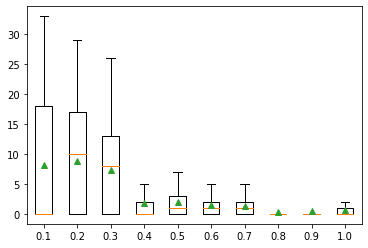

In [123]:
fig, ax = plt.subplots()
from copy import deepcopy
entries = []
for uptake in uptakes:
    dic = deepcopy(sts[uptake][overlap][.2][.05]['average-overall-death'])
    dic['label'] = uptake
    entries.append(dic)
f = ax.bxp(entries, showfliers=False, showmeans=True)

In [120]:
sts[1][overlap][0][taur]['average-max-infected']

{'mean': 9.888333333333334,
 'std': 37.20061388397325,
 'whislo': 1.0,
 'q1': 1.0,
 'med': 1.0,
 'q3': 1.0,
 'whishi': 1.0,
 'mean_wo': 162.12121212121212,
 'std_wo': 24.77367248683264}

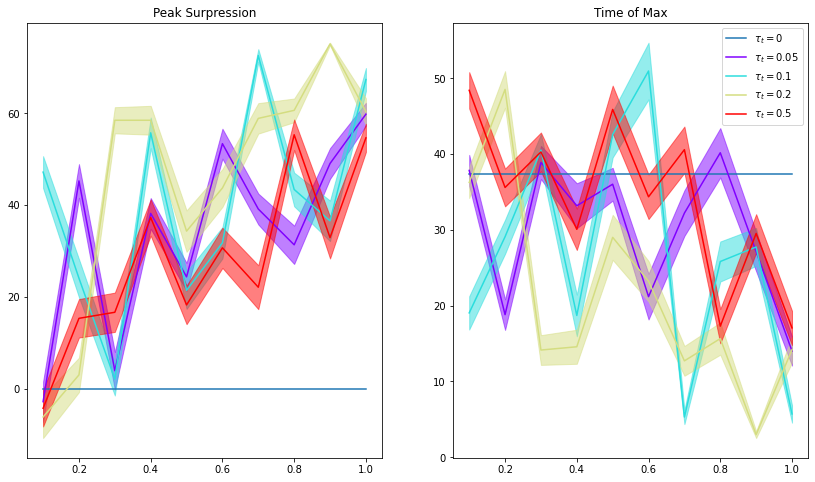

In [7]:
import numpy as np
import math
key_to_plot = 'mean'
err = 'std'
import matplotlib.cm as cm
tauts = [.05, .1, .2, .5]
colors = cm.rainbow(np.linspace(0, 1, len(tauts)))
import matplotlib.pyplot as plt
sts = res[pa]
uptakes = sorted(sts.keys())
tauts = [.05, .1, .2, .5]
taur = .1
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
# ax[0].set_yscale('log')
rate0 = sts[1][overlap][0][taur]['average-max-infected'][key_to_plot]
ax[0].plot(uptakes, [0] * len(uptakes), label=0)
ax[1].plot(uptakes, [sts[1][overlap][0][taur]['average-time-of-max-infected'][key_to_plot]] * len(uptakes), label=r'$\tau_t=0$')

for i, taut in enumerate(sorted(tauts)):
    to_plot = []
    to_plot_time = []
    error = []
    error_time = []
    for uptake in uptakes:
        if taut == 0:
            continue
#         try:
        item = sts[uptake][overlap][taut][taur]['average-max-infected']
        item_time = sts[uptake][overlap][taut][taur]['average-time-of-max-infected']
        to_plot.append(- item[key_to_plot] + rate0)
        to_plot_time.append(item_time[key_to_plot])
        error.append(item[err])
        error_time.append(item_time[err])
#         except:
#             pass
    error = np.array(error) * 1.96 / math.sqrt(50 * 15)
    error_time = np.array(error_time) * 1.96 / math.sqrt(50*15)
    ax[0].plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut), color=colors[i])
    ax[0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[i], alpha=.5)
    ax[1].plot(uptakes, to_plot_time, label=r'$\tau_t=$'+str(taut), color=colors[i])
    ax[1].fill_between(uptakes, to_plot_time-error_time, to_plot_time+error_time, color=colors[i], alpha=.5)
ax[0].set_title('Peak Surpression')
ax[1].set_title('Time of Max')
# ax[0].set_ylim(-20, None)
plt.legend()
# plt.savefig('fig/peak-surpression-and-time')

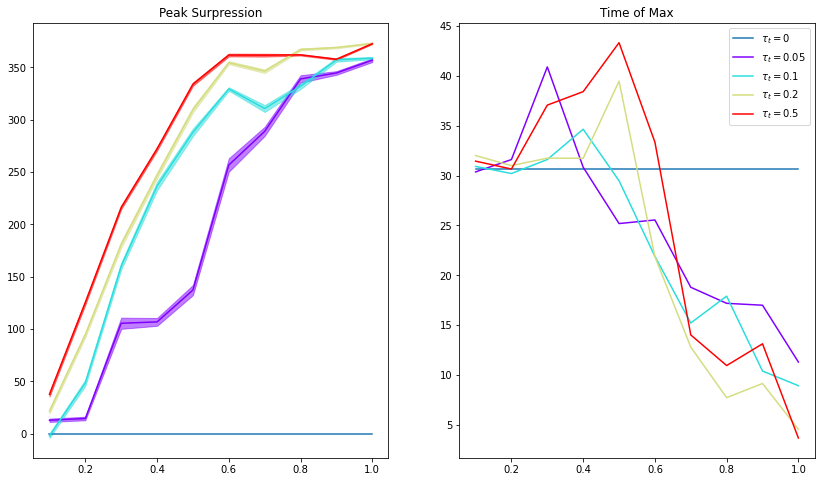

In [9]:
import numpy as np
import math
import matplotlib.cm as cm
tauts = [.05, .1, .2, .5]

colors = cm.rainbow(np.linspace(0, 1, len(tauts)))
key_to_plot = 'mean_wo'
err = 'std_wo'
import matplotlib.pyplot as plt
sts = res20[pa]
uptakes = sorted(sts.keys())
taur = .2
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
# ax[0].set_yscale('log')
rate0 = sts[1][overlap][0][taur]['average-max-infected'][key_to_plot]
# to_plot[to_plot < 1] = 1
ax[0].plot(uptakes, [0] * len(uptakes), label=0)
ax[1].plot(uptakes, [sts[1][overlap][0][taur]['average-time-of-max-infected'][key_to_plot]] * len(uptakes), label=r'$\tau_t=0$')

for i, taut in enumerate(sorted(tauts)):
    to_plot = []
    to_plot_time = []
    error = []
    for uptake in uptakes:
        if taut == 0:
            continue
#         try:
        item = sts[uptake][overlap][taut][taur]['average-max-infected']
        to_plot.append(- item[key_to_plot] + rate0)
        to_plot_time.append(sts[uptake][overlap][taut][taur]['average-time-of-max-infected'][key_to_plot])
        error.append(item[err])
#         except:
#             pass
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
#     error = np.array(error)
    ax[0].plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut), color=colors[i])
    ax[0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[i], alpha=.5)
    ax[1].plot(uptakes, to_plot_time, label=r'$\tau_t=$'+str(taut), color=colors[i])
ax[0].set_title('Peak Surpression')
ax[1].set_title('Time of Max')
plt.legend()
# plt.savefig('fig/peak-surpression-and-time')

In [86]:
pa = .2
taur = .2
overlap = 1
sts = res[pa]
key_to_plot = 'mean_wo'
std_plot = 'std_wo'

NameError: name 'std_plot' is not defined

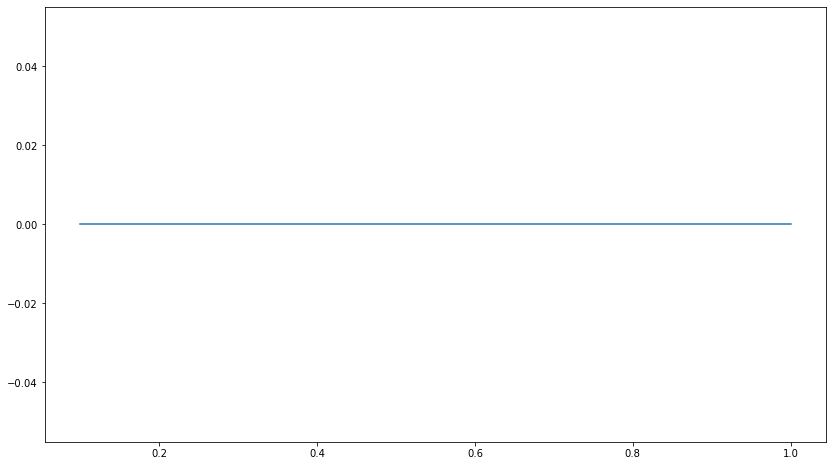

In [116]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(tauts)))
import numpy as np
import math
overlaps = sorted(sts.keys())

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
# ax[0].set_yscale('log')
rate0 = sts[1][overlap][0][taur]['average-overall-death'][key_to_plot]
# to_plot[to_plot < 1] = 1
ax.plot(uptakes, [0] * len(uptakes), label=0)

for i, taut in enumerate(sorted(tauts)):
    to_plot = []
    to_plot_time = []
    error= []
    for uptake in uptakes:
        if taut == 0:
            continue
        item = sts[uptake][overlap][taut][taur]['average-overall-death']
#         try:
        to_plot.append(- item[key_to_plot] + rate0)
        error.append(item[std_plot])
#         except:
#             pass
    to_plot = np.array(to_plot)
#     error = np.array(error)
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
    ax.plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut), color=colors[i])
    ax.fill_between(uptakes, to_plot-error, to_plot+error, color=colors[i], alpha=.5)
ax.set_title('Total deaths surpression')
plt.legend()

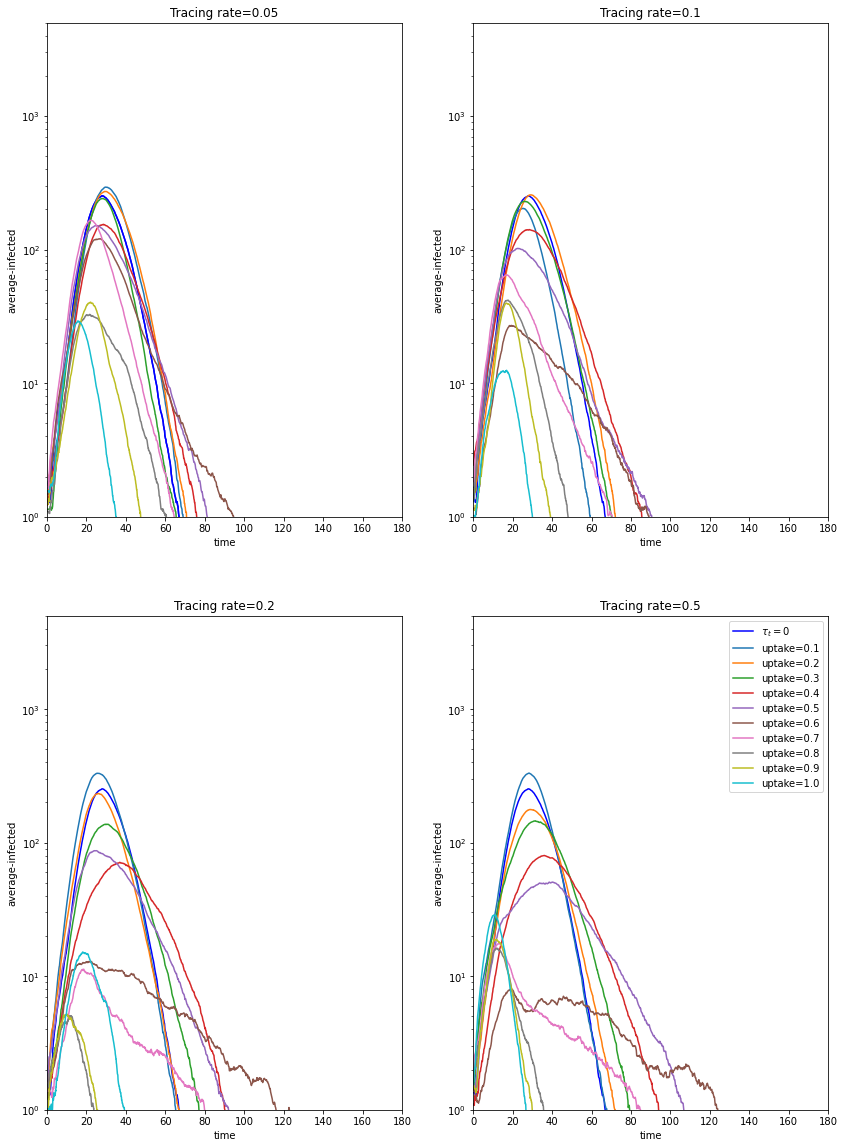

In [28]:
import matplotlib.pyplot as plt
key = 'mean'
pa = .2
sts = sts20
uptakes = sorted(sts.keys())
taur = .1
fig, ax = plt.subplots(2, 2, figsize=(14, 20))
ax[0][0].set_yscale('log')
ax[0][0].set_title('Tracing rate=' + str(0))
ax[0][0].set_xlim(0, 180)
ax[0][0].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
ax[0][0].set_ylabel('average-infected')
ax[0][0].set_ylim(1, 1000)


for k, taut in enumerate(tauts):
    if taut == 0:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_ylim(1, 5000)
    ax[i][j].set_xlabel('time')
    ax[i][j].set_ylabel('average-infected')
    ax[i][j].set_xlim(0,180)
    ax[i][j].set_yscale('log')
    ax[i][j].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
    ax[i][j].set_title('Tracing rate=' + str(taut))
    for uptake in uptakes:
        to_plot = [i[key] for i in sts[uptake][1][taut][taur]['average-infected']]
#         to_plot[to_plot<1] = 1
        ax[i][j].plot(sts[uptake][1][taut][taur]['time'], to_plot, label='uptake='+str(uptake))
        
plt.legend()

In [19]:
sts[1][1][.2][taur]['average-overall-false-traced']

{'mean': 499.68,
 'std': 480.62,
 'whislo': 0.0,
 'q1': 0.0,
 'med': 928.0,
 'q3': 967.0,
 'whishi': 996.0,
 'mean_wo': 792.83,
 'std_wo': 362.67}

<h1> K = 20

In [110]:
pa = .2
taur = .2
overlap = 1
sts = res20[pa]
key_to_plot = 'mean'

In [200]:
import copy
st = copy.deepcopy(sts)

In [49]:
res[.2][1][.3][1].keys()

dict_keys([0.2, 0.5, 0.05, 0.1])

In [140]:
pa = .2
sts10 = res[pa][1]
sts20 = res20[pa][1]

NameError: name 'res' is not defined

In [59]:
sts10.keys()

dict_keys([1.0, 0.7, 0.8, 0.9, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [12]:
import math

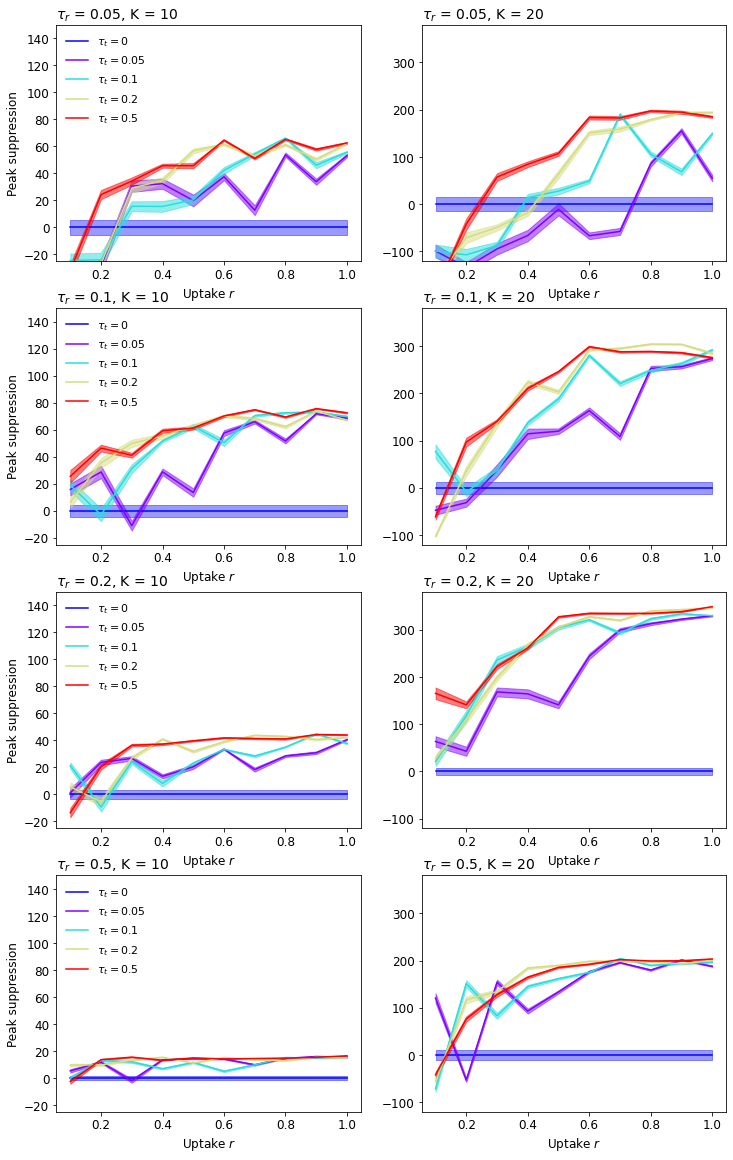

In [7]:
metric = 'average-max-infected'
lim = False
wo = '_wo' if lim else ''
key_to_plot = 'mean'+wo
err = 'std'+wo
ci = True
scale_ci = 1.96
overlap=1
import numpy as np
import math

import matplotlib.pyplot as plt
uptakes = sorted(sts10.keys())
tauts = [.05, .1, .2, .5]
taurs = [.05, .1, .2, .5]
fig, ax = plt.subplots(4, 2, figsize=(12, 20))
# ax[0].set_yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(tauts)))

scale = 0
for i, taur in enumerate(taurs):
    rate0_10 = sts10[1][overlap][0][taur][metric][key_to_plot]
    std_10 = sts10[1][overlap][0][taur][metric][err]
    rate0_20 = sts20[1][overlap][0][taur][metric][key_to_plot]
    std_20 = sts20[1][overlap][0][taur][metric][err]

    if ci:
        std_10 *= scale_ci / math.sqrt(50 * 15)
        std_20 *= scale_ci / math.sqrt(50 * 15)
        
    ax[i][0].set_title(r'$\tau_r$ = ' + str(taur) + ", K = 10", fontsize=14, loc='left')
    ax[i][1].set_title(r'$\tau_r$ = ' + str(taur) + ", K = 20", fontsize=14, loc='left')
    # to_plot[to_plot < 1] = 1
    array_0 = np.zeros(len(uptakes))
    ax[i][0].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
    ax[i][0].fill_between(uptakes, array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)
    ax[i][1].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
    ax[i][1].fill_between(uptakes, array_0 - std_20, array_0 + std_20, color='blue', alpha=.4)


    for j, taut in enumerate(sorted(tauts)):
        if taut == 0:
            continue
#         if taur == .05:
#             continue
        to_plot = []
        to_plot_20 = []
        error = []
        error_20 = []
        for uptake in uptakes:
            if taut == 0:
                continue
    #         try:
            item = sts10[uptake][overlap][taut][taur][metric]
            item_20 = sts20[uptake][overlap][taut][taur][metric]
            to_plot.append(- item[key_to_plot] + rate0_10)
            to_plot_20.append(- item_20[key_to_plot] + rate0_20)
            error.append(math.sqrt(item[err]**2 + std_10**2))
            error_20.append(math.sqrt(item_20[err]**2 + std_20**2))
    #         except:
    #             pass
        error = np.array(error)
        error_20 = np.array(error_20)
        if ci:
            error = scale_ci * error / math.sqrt(50 * 15)
            error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
        ax[i][0].set_ylim(-25, 150)
        ax[i][1].set_ylim(-120, 380)
        ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
        ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
        ax[i][1].plot(uptakes, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[j])
        ax[i][1].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
        ax[i][0].tick_params(axis='both', which='major', labelsize=12)
        ax[i][0].tick_params(axis='both', which='major', labelsize=12)
        ax[i][1].tick_params(axis='both', which='major', labelsize=12)
        ax[i][1].tick_params(axis='both', which='major', labelsize=12)
        ax[i][0].legend(loc='upper left', prop={'size': 11}, frameon=False)
        for k in range(2):
            ax[i][k].set_xlabel(r'Uptake $r$', fontsize=12)
        ax[i][0].set_ylabel(r'Peak suppression', fontsize=12)
# ax[0].set_ylim(-120, 300)
# ax[1].set_ylim(-120, 300)

plt.savefig('fig/uptake.pdf', format='pdf', bbox_inches = 'tight')

In [79]:
dic = {2:3}
dic.update({5:4, 3:4})

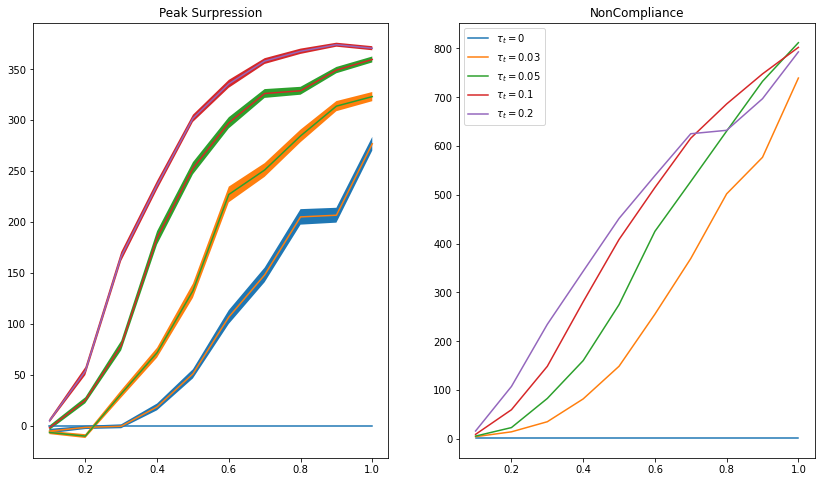

In [189]:
metric = 'average-overall-noncompliant'
key_to_plot = 'mean_wo'
err = 'std_wo'
import matplotlib.pyplot as plt
uptakes = sorted(results.keys())
tauts = [.03, .05, .1, .2]
taur = .1
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
# ax[0].set_yscale('log')
rate0 = sts[1][overlap][0][taur]['average-max-infected'][key_to_plot]
# to_plot[to_plot < 1] = 1
ax[0].plot(uptakes, [0] * len(uptakes), label=0)
ax[1].plot(uptakes, [sts[1][overlap][0][taur][metric][key_to_plot]] * len(uptakes), label=r'$\tau_t=0$')

for taut in sorted(tauts):
    to_plot = []
    to_plot_time = []
    error = []
    for uptake in uptakes:
        if taut == 0:
            continue
#         try:
        item = sts[uptake][overlap][taut][taur]['average-max-infected']
        to_plot.append(- item[key_to_plot] + rate0)
        to_plot_time.append(sts[uptake][overlap][taut][taur][metric][key_to_plot])
        error.append(item[err])
#         except:
#             pass
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
#     error = np.array(error)
    ax[0].plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut))
    ax[0].fill_between(uptakes, to_plot-error, to_plot+error)
    ax[1].plot(uptakes, to_plot_time, label=r'$\tau_t=$'+str(taut))
ax[0].set_title('Peak Surpression')
ax[1].set_title('NonCompliance')
plt.legend()
# plt.savefig('fig/peak-surpression-and-time')

In [302]:
key = 'mean'

In [355]:
sts = res20[pa]

In [352]:
sts.keys()

dict_keys([1.0, 0.7, 0.8, 0.9, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

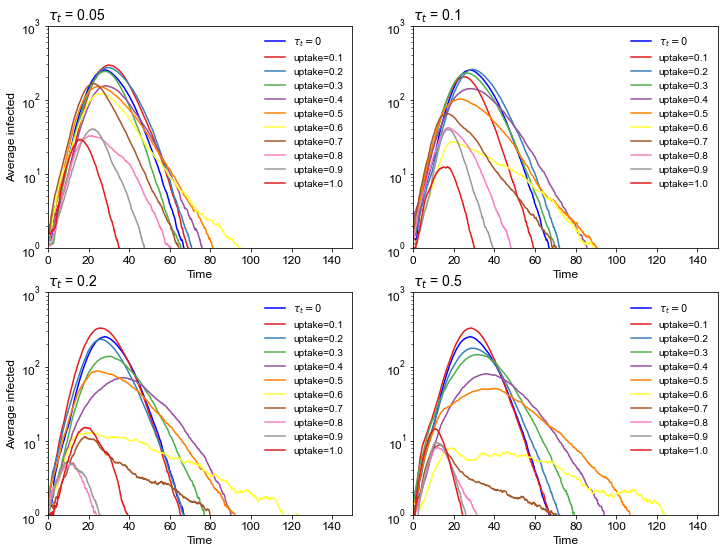

In [164]:
import matplotlib.pyplot as plt
key = 'mean'
err = 'std'
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
# plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Spectral(np.linspace(0, 1, 10), alpha=1))
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.get_cmap('Set1').colors)
pa = .2
tauts = [.05, .1, .2, .5]
uptake = 1
sts = res20[pa][1]
uptakes = sorted(sts.keys())
taur = .1
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
# ax[0][0].set_yscale('log')
# ax[0][0].set_title('Tracing rate=' + str(0))
# ax[0][0].set_xlim(0, 150)
# ax[0][0].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
# ax[0][0].set_ylabel('average-infected')
# ax[0][0].set_ylim(1, 1000)

weigh = 1

for k, taut in enumerate(tauts):
    if taut == 0:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_ylim(1, 1000)
    ax[i][j].set_xlabel('Time', fontsize=12)
    ax[i][0].set_ylabel('Average infected', fontsize=12)
    ax[i][j].set_xlim(0,150)
    ax[i][j].set_yscale('log')
    ax[i][j].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
    ax[i][j].set_title(r'$\tau_t$ = ' + str(taut), loc='left', fontsize=14)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    for uptake in uptakes:
        to_plot = [i[key] for i in sts[uptake][1][taut][taur]['average-infected']]
#         to_plot[to_plot<1] = 1
        ax[i][j].plot(sts[uptake][1][taut][taur]['time'], to_plot, label='uptake='+str(uptake))
    ax[i][j].legend(loc='upper right', prop={'size': 10}, frameon=False)
plt.savefig('fig/uptake-evol.pdf', format='pdf', bbox_inches = 'tight')

[0.05, 0.1, 0.2, 0.5]

In [130]:
import os
os.chdir('D:\OneDrive - University of Southampton\PhD\Contact')
import lib.utils as ut
res20 = ut.process_json_results('data/run/batch7_slurm/')

In [129]:
sts[1].keys()

dict_keys([1.0])

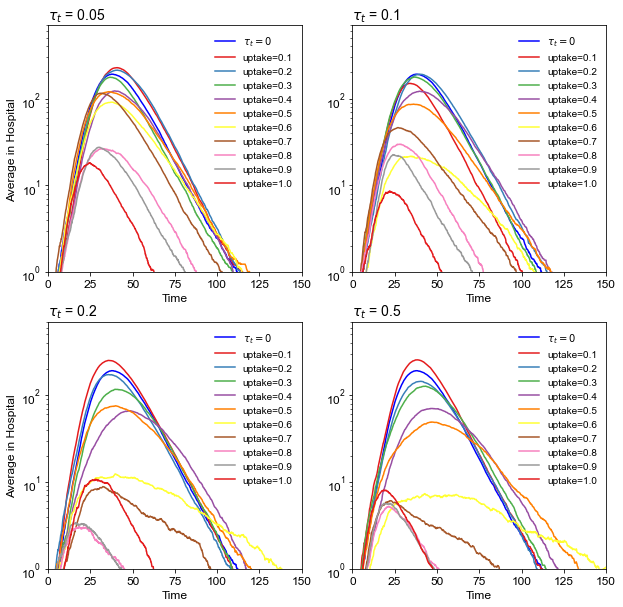

In [167]:
import matplotlib.pyplot as plt
import math
import numpy as np
tauts = [0.05, 0.1, 0.2, 0.5]
uptakes = np.linspace(0, 1, 10)
key = 'mean'
err = 'std'
metric = 'average-hospital'
pa = .2
sts = res20[pa][1]
tauts = [0.05, 0.1, 0.2, 0.5]
uptakes = sorted(sts.keys())
colors = plt.cm.rainbow(np.linspace(0, 1, len(uptakes)))
taur = .1
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
# plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Spectral(np.linspace(0, 1, 10), alpha=1))
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.get_cmap('Set1').colors)
# ax[0][0].set_yscale('log')
# ax[0][0].set_title('Tracing rate=' + str(0))
# ax[0][0].set_xlim(0, 150)
# ax[0][0].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
# ax[0][0].set_ylabel('average-infected')
# ax[0][0].set_ylim(1, 1000)

for k, taut in enumerate(tauts):
    if taut == 0:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_ylim(1, 700)
    ax[i][j].set_xlabel('Time', fontsize=12)
    ax[i][0].set_ylabel('Average in Hospital', fontsize=12)
    ax[i][j].set_xlim(0,150)
    ax[i][j].set_yscale('log')
    main = np.array([i[key] for i in sts[1][1][0][taur][metric]])
    error = np.array([1.96 * i[err] / math.sqrt(50 * 15) for i in sts[1][1][0][taur][metric]])

    ax[i][j].plot(sts[1][1][0][taur]['time'], main, label=r'$\tau_t=0$', c='b')

#     ax[i][j].fill_between(sts[1][1][0][taur]['time'], main - error, main + error, color='b', alpha=0.2)

    ax[i][j].set_title(r'$\tau_t$ = ' + str(taut), loc='left', fontsize=14)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    for k, uptake in enumerate(uptakes):
        to_plot = np.array([i[key] for i in sts[uptake][1][taut][taur][metric]], dtype=float)
        error = np.array([1.96 * i[err] / math.sqrt(50 * 15) for i in sts[uptake][1][taut][taur][metric]], dtype=float)
#         to_plot[to_plot<1] = 1
        ax[i][j].plot(sts[uptake][1][taut][taur]['time'], to_plot, label='uptake='+str(uptake))
        error1 = np.array(to_plot - error, dtype=float)
        error2 = np.array(to_plot + error, dtype=float)
#         ax[i][j].fill_between(sts[uptake][1][taut][taur]['time'], error1, error2, alpha=0.2, color=colors[k])
    ax[i][j].legend(loc='upper right', prop={'size': 10}, frameon=False, ncol=1)
plt.savefig('fig/uptake-hosp.pdf', format='pdf', bbox_inches = 'tight')

In [119]:
uptakes

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

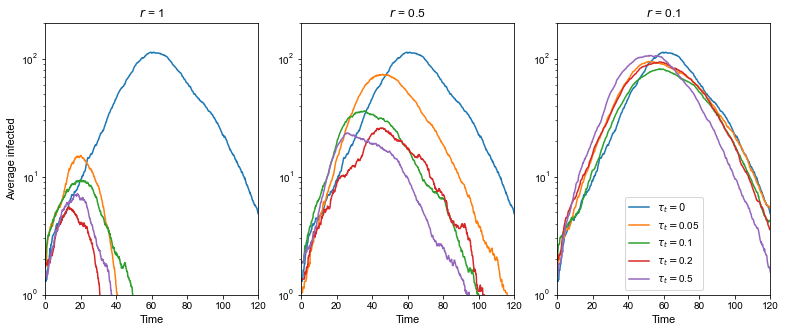

In [162]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
plt.set_cmap('rainbow')
ax[0].set_title('$r$ = 1', fontsize=12)
ax[1].set_title('$r$ = 0.5', fontsize=12)
ax[2].set_title('$r$ = 0.1', fontsize=12)

m = 'mean_wo'

sts = res[pa][1] # the case with K=10 degree
taur = 0.05

to_plot = [i[m] for i in sts[1][1][0][taur]['average-infected']]

ax[0].set_ylabel('Average infected', fontsize=11)

for i in range(3):
    ax[i].set_ylim(1, 200)
    ax[i].set_xlabel('Time', fontsize=11)
    ax[i].set_yscale('log')
    ax[i].plot(sts[1][1][0][taur]['time'], to_plot, label=r'$\tau_t=0$')
    ax[i].set_xlim(0, 120)


# to_plot[to_plot < 1] = 1
for taut in sorted(sts[1][1]):
    if taut == 0:
        continue
#     try:

    to_plot = [i[m] for i in sts[1][1][taut][taur]['average-infected']]
#         to_plot[to_plot < 1] = 1
    ax[0].plot(sts[1][1][taut][taur]['time'], to_plot, label=r'$\tau_t=$'+str(taut))
    
    to_plot = [i[m] for i in sts[0.5][1][taut][taur]['average-infected']]
#         to_plot[to_plot < 1] = 1
    ax[1].plot(sts[0.5][1][taut][taur]['time'], to_plot, label=r'$\tau_t=$'+str(taut))
    

    to_plot = [i[m] for i in sts[0.1][1][taut][taur]['average-infected']]
#         to_plot[to_plot < 1] = 1
    ax[2].plot(sts[0.1][1][taut][taur]['time'], to_plot, label=r'$\tau_t=$'+str(taut))
#     except:
#         pass
plt.legend(loc='lower center')
plt.savefig('fig/uptake-trend.pdf', format='pdf', bbox_inches = 'tight')

In [159]:
sts[1][1][0][taur]['average-infected'][0:10]

[{'mean': 1.16,
  'std': 0.37,
  'whislo': 1.0,
  'q1': 1.0,
  'med': 1.0,
  'q3': 1.0,
  'whishi': 1.0,
  'mean_wo': 1.3,
  'std_wo': 0.46},
 {'mean': 1.16,
  'std': 0.37,
  'whislo': 1.0,
  'q1': 1.0,
  'med': 1.0,
  'q3': 1.0,
  'whishi': 1.0,
  'mean_wo': 1.3,
  'std_wo': 0.46},
 {'mean': 1.16,
  'std': 0.37,
  'whislo': 1.0,
  'q1': 1.0,
  'med': 1.0,
  'q3': 1.0,
  'whishi': 1.0,
  'mean_wo': 1.3,
  'std_wo': 0.46},
 {'mean': 1.22,
  'std': 0.46,
  'whislo': 1.0,
  'q1': 1.0,
  'med': 1.0,
  'q3': 1.0,
  'whishi': 1.0,
  'mean_wo': 1.35,
  'std_wo': 0.48},
 {'mean': 1.22,
  'std': 0.54,
  'whislo': 0.0,
  'q1': 1.0,
  'med': 1.0,
  'q3': 2.0,
  'whishi': 2.0,
  'mean_wo': 1.35,
  'std_wo': 0.48},
 {'mean': 1.34,
  'std': 0.59,
  'whislo': 0.0,
  'q1': 1.0,
  'med': 1.0,
  'q3': 2.0,
  'whishi': 2.0,
  'mean_wo': 1.61,
  'std_wo': 0.49},
 {'mean': 1.26,
  'std': 0.72,
  'whislo': 0.0,
  'q1': 1.0,
  'med': 1.0,
  'q3': 2.0,
  'whishi': 3.0,
  'mean_wo': 1.61,
  'std_wo': 0.49},
 {

In [158]:
sts[0.5][1][.5][taur]['average-infected'][0:10]

[{'mean': 1.72,
  'std': 0.45,
  'whislo': 1.0,
  'q1': 1.0,
  'med': 2.0,
  'q3': 2.0,
  'whishi': 2.0,
  'mean_wo': 1.85,
  'std_wo': 0.36},
 {'mean': 1.72,
  'std': 0.45,
  'whislo': 1.0,
  'q1': 1.0,
  'med': 2.0,
  'q3': 2.0,
  'whishi': 2.0,
  'mean_wo': 1.85,
  'std_wo': 0.36},
 {'mean': 1.8,
  'std': 0.4,
  'whislo': 2.0,
  'q1': 2.0,
  'med': 2.0,
  'q3': 2.0,
  'whishi': 2.0,
  'mean_wo': 1.87,
  'std_wo': 0.33},
 {'mean': 1.8,
  'std': 0.4,
  'whislo': 2.0,
  'q1': 2.0,
  'med': 2.0,
  'q3': 2.0,
  'whishi': 2.0,
  'mean_wo': 1.87,
  'std_wo': 0.33},
 {'mean': 1.8,
  'std': 0.4,
  'whislo': 2.0,
  'q1': 2.0,
  'med': 2.0,
  'q3': 2.0,
  'whishi': 2.0,
  'mean_wo': 1.87,
  'std_wo': 0.33},
 {'mean': 1.8,
  'std': 0.4,
  'whislo': 2.0,
  'q1': 2.0,
  'med': 2.0,
  'q3': 2.0,
  'whishi': 2.0,
  'mean_wo': 1.87,
  'std_wo': 0.33},
 {'mean': 1.8,
  'std': 0.4,
  'whislo': 2.0,
  'q1': 2.0,
  'med': 2.0,
  'q3': 2.0,
  'whishi': 2.0,
  'mean_wo': 1.87,
  'std_wo': 0.33},
 {'mean':

<h1> Analyze early stop

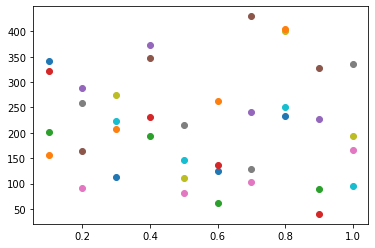

In [236]:
pa = .2
taur = .05
sts = res[pa]
for uptake in uptakes:
    for taut in tauts:
        plt.scatter(uptake, sts[uptake][1][taut][taur]['early-stopped'])

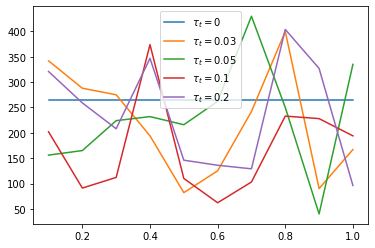

In [244]:
fig, ax = plt.subplots()
ax.plot(uptakes, [sts[1][overlap][0][taur]['early-stopped']] * len(uptakes), label=r'$\tau_t=0$')
for taut in sorted(tauts):
    to_plot = []
    for uptake in uptakes:
#         if taut == 0:
#             continue
#         try:
        item = sts[uptake][overlap][taut][taur]['early-stopped']
        to_plot.append(item)
#         except:
#             pass
    error = 1.96 * np.array(error) / math.sqrt(40 * 15)
#     error = np.array(error)
    ax.plot(uptakes, to_plot, label=r'$\tau_t=$'+str(taut))
plt.legend()

<h1> Analyzing results for Holme-Kim graphs and dual-triad tracing

In [66]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('D:\OneDrive - University of Southampton\PhD\Contact')
import lib.utils as ut
ut.rel(ut)
holmekim = ut.process_json_results('data/run/batch8_pbs/', overlap_to_capture='overlap_two')
# al = resi[.2]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
ali = holmekim[.2]

In [34]:
al = resi[.2]

In [46]:
al[1][.55][1].keys()

dict_keys([0.0, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0])

Text(0.5, 0.98, 'Triad w/ 0.55')

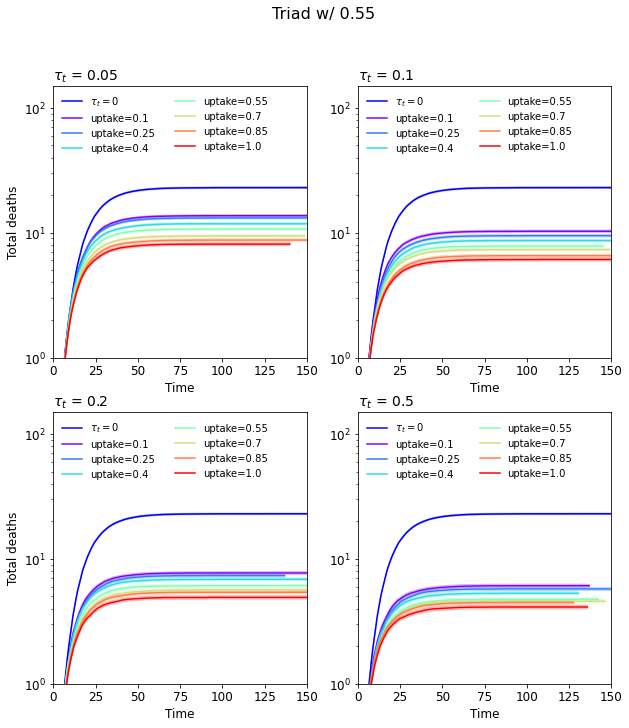

In [14]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
import numpy as np
tauts = [0.05, 0.1, 0.2, 0.5]
uptakes = np.linspace(0.1, 1, 7)
key = 'mean'
err = 'std'
dual = 2
sts = al[dual]
tauts = [0.05, 0.1, 0.2, 0.5]
colors = plt.cm.rainbow(np.linspace(0, 1, len(uptakes)))
uptakes = sorted(sts.keys())
uptake_base = 1
taur = .1
overlap = .55
fig, ax = plt.subplots(2, 2, figsize=(10, 11))
# ax[0][0].set_yscale('log')
# ax[0][0].set_title('Tracing rate=' + str(0))
# ax[0][0].set_xlim(0, 150)
# ax[0][0].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
# ax[0][0].set_ylabel('average-infected')
# ax[0][0].set_ylim(1, 1000)

for k, taut in enumerate(tauts):
    if taut == 0:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_ylim(1, 150)
    ax[i][j].set_xlabel('Time', fontsize=12)
    ax[i][0].set_ylabel('Total deaths', fontsize=12)
    ax[i][j].set_xlim(0,150)
    ax[i][j].set_yscale('log')
    main = np.array([i[key] for i in sts[1][overlap][0][taur]['average-total-death']])
    error = np.array([1.96 * i[err] / math.sqrt(50 * 15) for i in sts[1][overlap][0][taur]['average-total-death']])

    ax[i][j].plot(sts[uptake_base][overlap][0][taur]['time'], main, label=r'$\tau_t=0$', c='b')

    ax[i][j].fill_between(sts[uptake_base][overlap][0][taur]['time'], main - error, main + error, color='b', alpha=0.2)

    ax[i][j].set_title(r'$\tau_t$ = ' + str(taut), loc='left', fontsize=14)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    for k, uptake in enumerate(uptakes):
        to_plot = np.array([i[key] for i in sts[uptake][overlap][taut][taur]['average-total-death']], dtype=float)
        error = np.array([1.96 * i[err] / math.sqrt(50 * 15) for i in sts[uptake][overlap][taut][taur]['average-total-death']], dtype=float)
#         to_plot[to_plot<1] = 1
        ax[i][j].plot(sts[uptake][overlap][taut][taur]['time'], to_plot, label='uptake='+str(uptake), color=colors[k])
        error1 = np.array(to_plot - error, dtype=float)
        error2 = np.array(to_plot + error, dtype=float)
        ax[i][j].fill_between(sts[uptake][overlap][taut][taur]['time'], error1, error2, alpha=0.2, color=colors[k])
    ax[i][j].legend(loc='upper left', prop={'size': 10}, frameon=False, ncol=2)
# plt.savefig('fig/uptake-death', bbox_inches = 'tight')
fig.suptitle("Triad w/ " + str(overlap), fontsize=16)

Text(0.5, 0.98, 'Dual')

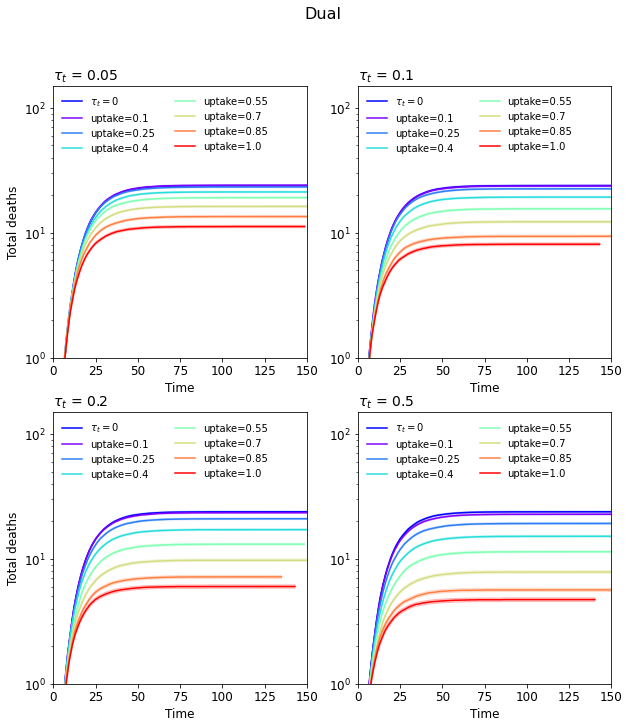

In [115]:
import matplotlib.pyplot as plt
import math
import numpy as np
tauts = [0.05, 0.1, 0.2, 0.5]
uptakes = np.linspace(0.1, 1, 7)
key = 'mean'
err = 'std'
dual = 1
sts = al[dual]
tauts = [0.05, 0.1, 0.2, 0.5]
colors = plt.cm.rainbow(np.linspace(0, 1, len(uptakes)))
uptakes = sorted(sts.keys())
uptake_base = 1
taur = .1
overlap = 1
fig, ax = plt.subplots(2, 2, figsize=(10, 11))
# ax[0][0].set_yscale('log')
# ax[0][0].set_title('Tracing rate=' + str(0))
# ax[0][0].set_xlim(0, 150)
# ax[0][0].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
# ax[0][0].set_ylabel('average-infected')
# ax[0][0].set_ylim(1, 1000)

for k, taut in enumerate(tauts):
    if taut == 0:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_ylim(1, 150)
    ax[i][j].set_xlabel('Time', fontsize=12)
    ax[i][0].set_ylabel('Total deaths', fontsize=12)
    ax[i][j].set_xlim(0,150)
    ax[i][j].set_yscale('log')
    main = np.array([i[key] for i in sts[1][overlap][0][taur]['average-total-death']])
    error = np.array([1.96 * i[err] / math.sqrt(50 * 15) for i in sts[1][overlap][0][taur]['average-total-death']])

    ax[i][j].plot(sts[uptake_base][overlap][0][taur]['time'], main, label=r'$\tau_t=0$', c='b')

    ax[i][j].fill_between(sts[uptake_base][overlap][0][taur]['time'], main - error, main + error, color='b', alpha=0.2)

    ax[i][j].set_title(r'$\tau_t$ = ' + str(taut), loc='left', fontsize=14)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    for k, uptake in enumerate(uptakes):
        to_plot = np.array([i[key] for i in sts[uptake][overlap][taut][taur]['average-total-death']], dtype=float)
        error = np.array([1.96 * i[err] / math.sqrt(50 * 15) for i in sts[uptake][overlap][taut][taur]['average-total-death']], dtype=float)
#         to_plot[to_plot<1] = 1
        ax[i][j].plot(sts[uptake][overlap][taut][taur]['time'], to_plot, label='uptake='+str(uptake), color=colors[k])
        error1 = np.array(to_plot - error, dtype=float)
        error2 = np.array(to_plot + error, dtype=float)
        ax[i][j].fill_between(sts[uptake][overlap][taut][taur]['time'], error1, error2, alpha=0.2, color=colors[k])
    ax[i][j].legend(loc='upper left', prop={'size': 10}, frameon=False, ncol=2)
# plt.savefig('fig/uptake-death', bbox_inches = 'tight')
fig.suptitle("Dual", fontsize=16)

In [49]:
al[1][0.1][1].keys()

dict_keys([0.05, 0.1, 0.2, 0.5])

In [45]:
uptakes

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [47]:
uptakes = sorted(sts10.keys())
uptakes

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [48]:
 np.linspace(.1, 1, 7)

array([0.1 , 0.25, 0.4 , 0.55, 0.7 , 0.85, 1.  ])

In [252]:
rate0_10

376.12

In [51]:
from matplotlib import rcParams, rcParamsDefault
rcParams['font.sans-serif'] = ['Arial']

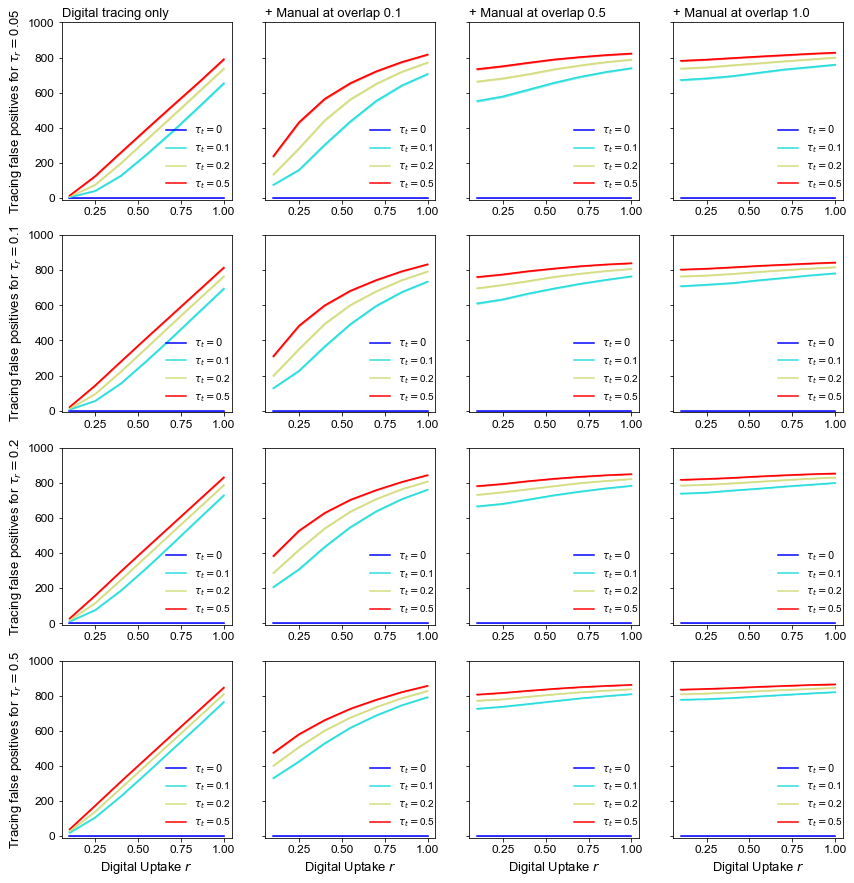

In [55]:
metric = 'average-overall-false-traced'
key_to_plot = 'mean'
err = 'std'
ci = True
scale_ci = 1.96
overlap = .55
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

overlaps = [.1, .55, 1]

sts10 = al[1]
sts20 = al[2]

import matplotlib.pyplot as plt
uptakes = sorted(sts10.keys())
tauts = [.05, .1, .2, .5]
taurs = [.05, .1, .2, .5]
fig, ax = plt.subplots(4, 4, figsize=(14, 15))
colors = plt.cm.rainbow(np.linspace(0, 1, len(tauts)))
# ax[0].set_yscale('log')

for k, overlap in enumerate(overlaps):
    k += 1
    for i, taur in enumerate(taurs):
        rate0_10 = sts10[1][1][0][taur][metric][key_to_plot]
        std_10 = sts10[1][1][0][taur][metric][err]
        rate0_20 = sts20[1][overlap][0][taur][metric][key_to_plot]
        std_20 = sts20[1][overlap][0][taur][metric][err]

        if ci:
            std_10 *= scale_ci / math.sqrt(50 * 15)
#             std_20 *= scale_ci / math.sqrt(50 * 15)
        
        if not i:
            ax[i][0].set_title("Digital tracing only", fontsize=13, loc='left')
            ax[i][k].set_title("+ Manual at overlap " + str(math.floor(overlap*10)/10), fontsize=13, loc='left')
        # to_plot[to_plot < 1] = 1
        array_0 = np.zeros(len(uptakes))
        if k == 2:
            ax[i][0].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
            ax[i][0].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)
        ax[i][k].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
        ax[i][k].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)


        for j, taut in enumerate(sorted(tauts)):
            if taut == 0 or taut == .05:
                continue
            to_plot = []
            to_plot_20 = []
            error = []
            error_20 = []
            for uptake in uptakes:
                if taut == 0:
                    continue
        #         try:
                item = sts10[uptake][1][taut][taur][metric]
                item_20 = sts20[uptake][overlap][taut][taur][metric]
                to_plot.append(item[key_to_plot])
                to_plot_20.append(item_20[key_to_plot])
                error.append(math.sqrt(item[err]**2 + std_10**2))
                error_20.append(math.sqrt(item_20[err]**2 + std_10**2))
        #         except:
        #             pass
            error = np.array(error)
            error_20 = np.array(error_20)
            if ci:
                error = scale_ci * error / math.sqrt(50 * 15)
                error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
            if k == 2:
                ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
                ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
                ax[i][0].legend(loc='lower right', bbox_to_anchor=(0.5, 0, 0.55, 1), prop={'size': 10}, frameon=False)
                
            ax[i][k].plot(uptakes, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[j])
            ax[i][k].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
            ax[i][k].legend(loc='lower right', bbox_to_anchor=(0.5, 0, 0.55, 1), prop={'size': 10}, frameon=False)
            for l in range(4):
                ax[-1][l].set_xlabel(r'Digital Uptake $r$', fontsize=13)
            ax[i][0].set_ylabel(r'Tracing false positives for $\tau_r=$' + str(taur), fontsize=13)
            ax[i][0].set_ylim(-10, 1000)
            ax[i][k].set_ylim(-10, 1000)
            ax[i][k].tick_params(labelleft=False)
# ax[0].set_ylim(-120, 300)
# ax[1].set_ylim(-120, 300)
plt.savefig('fig/triad-false-pos.pdf', format='pdf', bbox_inches = 'tight')

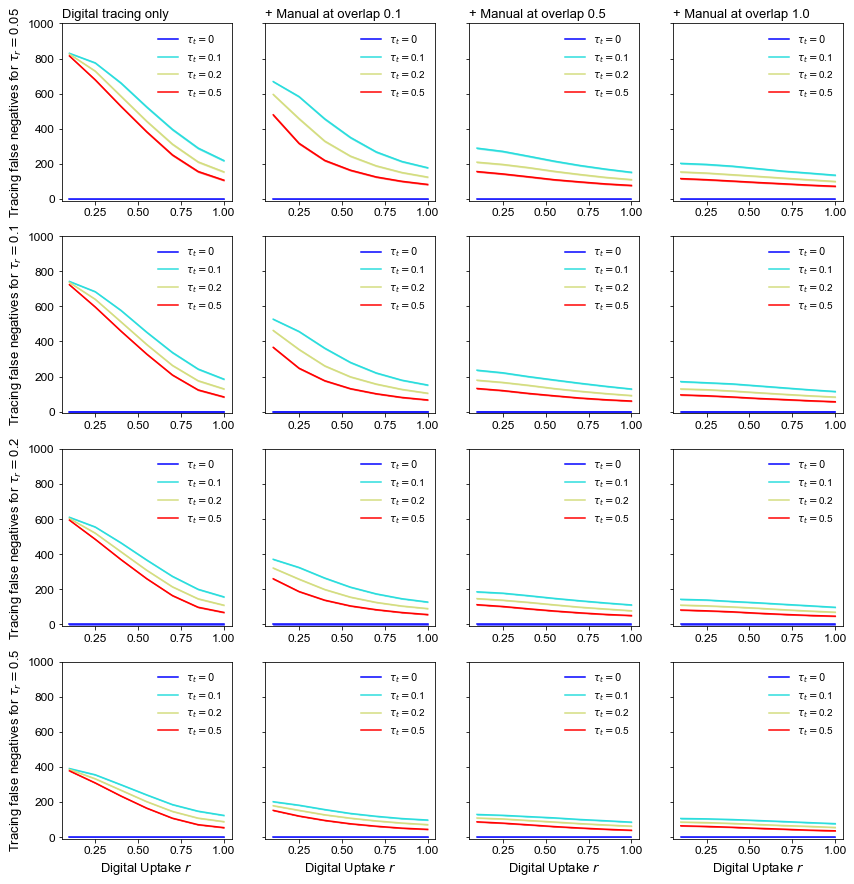

In [67]:
metric = 'average-overall-false-negative'
key_to_plot = 'mean'
err = 'std'
ci = True
scale_ci = 1.96
overlap = .55
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

overlaps = [.1, .55, 1]

sts10 = al[1]
sts20 = al[2]

import matplotlib.pyplot as plt
uptakes = sorted(sts10.keys())
tauts = [.05, .1, .2, .5]
taurs = [.05, .1, .2, .5]
fig, ax = plt.subplots(4, 4, figsize=(14, 15))
colors = plt.cm.rainbow(np.linspace(0, 1, len(tauts)))
# ax[0].set_yscale('log')

for k, overlap in enumerate(overlaps):
    k += 1
    for i, taur in enumerate(taurs):
        rate0_10 = sts10[1][1][0][taur][metric][key_to_plot]
        std_10 = sts10[1][1][0][taur][metric][err]
        rate0_20 = sts20[1][overlap][0][taur][metric][key_to_plot]
        std_20 = sts20[1][overlap][0][taur][metric][err]

        if ci:
            std_10 *= scale_ci / math.sqrt(50 * 15)
#             std_20 *= scale_ci / math.sqrt(50 * 15)
        
        if not i:
            ax[i][0].set_title("Digital tracing only", fontsize=13, loc='left')
            ax[i][k].set_title("+ Manual at overlap " + str(math.floor(overlap*10)/10), fontsize=13, loc='left')
        # to_plot[to_plot < 1] = 1
        array_0 = np.zeros(len(uptakes))
        if k == 2:
            ax[i][0].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
            ax[i][0].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)
        ax[i][k].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
        ax[i][k].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)


        for j, taut in enumerate(sorted(tauts)):
            if taut == 0 or taut == .05:
                continue
            to_plot = []
            to_plot_20 = []
            error = []
            error_20 = []
            for uptake in uptakes:
                if taut == 0:
                    continue
        #         try:
                item = sts10[uptake][1][taut][taur][metric]
                item_20 = sts20[uptake][overlap][taut][taur][metric]
                to_plot.append(item[key_to_plot])
                to_plot_20.append(item_20[key_to_plot])
                error.append(math.sqrt(item[err]**2 + std_10**2))
                error_20.append(math.sqrt(item_20[err]**2 + std_10**2))
        #         except:
        #             pass
            error = np.array(error)
            error_20 = np.array(error_20)
            if ci:
                error = scale_ci * error / math.sqrt(50 * 15)
                error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
            if k == 2:
                ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
                ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
                ax[i][0].legend(loc='upper right', bbox_to_anchor=(0.45, 0, 0.55, 1), prop={'size': 10}, frameon=False)
                
            ax[i][k].plot(uptakes, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[j])
            ax[i][k].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
            ax[i][k].legend(loc='upper right', bbox_to_anchor=(0.45, 0, 0.55, 1), prop={'size': 10}, frameon=False)
            for l in range(4):
                ax[-1][l].set_xlabel(r'Digital Uptake $r$', fontsize=13)
            ax[i][0].set_ylabel(r'Tracing false negatives for $\tau_r=$' + str(taur), fontsize=13)
            ax[i][0].set_ylim(-10, 1000)
            ax[i][k].set_ylim(-10, 1000)
            ax[i][k].tick_params(labelleft=False)
# ax[0].set_ylim(-120, 300)
# ax[1].set_ylim(-120, 300)
plt.savefig('fig/triad-false-neg.pdf', format='pdf', bbox_inches = 'tight')

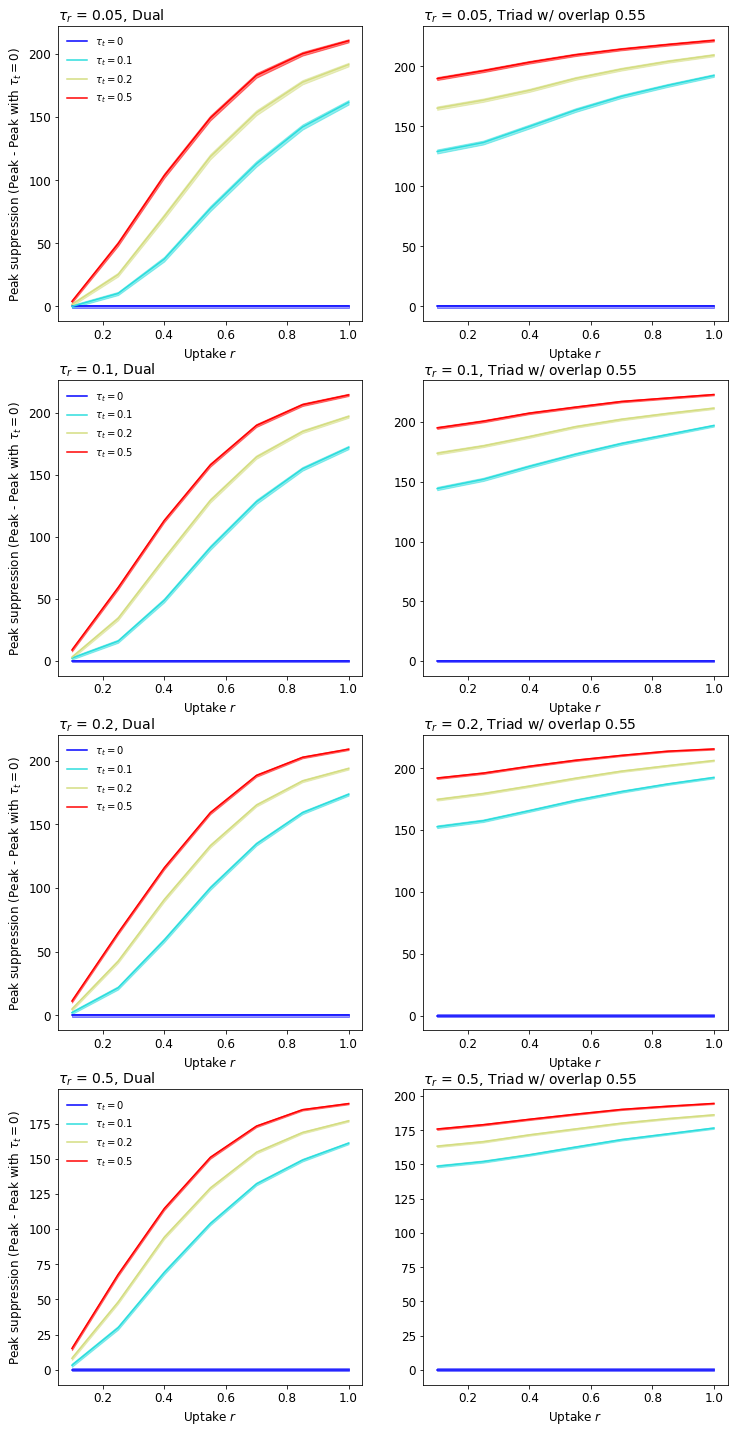

In [117]:
metric = 'average-max-hospital'
key_to_plot = 'mean'
err = 'std'
ci = True
scale_ci = 1.96
overlap = .55

sts10 = al[1]
sts20 = al[2]

import matplotlib.pyplot as plt
uptakes = sorted(sts.keys())
tauts = [.05, .1, .2, .5]
taurs = [.05, .1, .2, .5]
fig, ax = plt.subplots(4, 2, figsize=(12, 25))
# ax[0].set_yscale('log')
colors = cm.rainbow(np.linspace(0, 1, len(tauts)))


for i, taur in enumerate(taurs):
    rate0_10 = sts10[1][1][0][taur][metric][key_to_plot]
    std_10 = sts10[1][1][0][taur][metric][err]
    rate0_20 = sts20[1][overlap][0][taur][metric][key_to_plot]
    std_20 = sts20[1][overlap][0][taur][metric][err]

    if ci:
        std_10 *= scale_ci / math.sqrt(50 * 15)
        std_20 *= scale_ci / math.sqrt(50 * 15)
        
    ax[i][0].set_title(r'$\tau_r$ = ' + str(taur) + ", Dual", fontsize=14, loc='left')
    ax[i][1].set_title(r'$\tau_r$ = ' + str(taur) + ", Triad w/ overlap " + str(overlap), fontsize=14, loc='left')
    # to_plot[to_plot < 1] = 1
    array_0 = np.zeros(len(uptakes))
    ax[i][0].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
    ax[i][0].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)
    ax[i][1].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
    ax[i][1].fill_between(uptakes ,array_0 - std_20, array_0 + std_20, color='blue', alpha=.4)


    for j, taut in enumerate(sorted(tauts)):
        if taut == 0 or taut == .05:
            continue
        to_plot = []
        to_plot_20 = []
        error = []
        error_20 = []
        for uptake in uptakes:
            if taut == 0:
                continue
    #         try:
            item = sts10[uptake][1][taut][taur][metric]
            item_20 = sts20[uptake][overlap][taut][taur][metric]
            to_plot.append(- item[key_to_plot] + rate0_10)
            to_plot_20.append(- item_20[key_to_plot] + rate0_10)
            error.append(math.sqrt(item[err]**2 + std_10**2))
            error_20.append(math.sqrt(item_20[err]**2 + std_10**2))
    #         except:
    #             pass
        error = np.array(error)
        error_20 = np.array(error_20)
        if ci:
            error = scale_ci * error / math.sqrt(50 * 15)
            error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
#         ax[i][0].set_ylim(-20, 90)
#         ax[i][1].set_ylim(-120, 350)
        ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
        ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
        ax[i][1].plot(uptakes, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[j])
        ax[i][1].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
        ax[i][0].tick_params(axis='both', which='major', labelsize=12)
        ax[i][0].tick_params(axis='both', which='major', labelsize=12)
        ax[i][1].tick_params(axis='both', which='major', labelsize=12)
        ax[i][1].tick_params(axis='both', which='major', labelsize=12)
        ax[i][0].legend(loc='upper left', prop={'size': 10}, frameon=False)
        for k in range(2):
            ax[i][k].set_xlabel(r'Uptake $r$', fontsize=12)
        ax[i][0].set_ylabel(r'Peak suppression (Peak - Peak with $\tau_t=$0)', fontsize=12)
# ax[0].set_ylim(-120, 300)
# ax[1].set_ylim(-120, 300)

# plt.savefig('fig/uptake', bbox_inches = 'tight')

In [41]:
sts10[1][1][0][0.05].keys()

dict_keys(['average-max-infected', 'r-eff', 'growth'])

In [35]:
dual = 2
sts = al[dual]

In [65]:
sts10[1][1][0.2].keys()

dict_keys([0.05, 0.1])

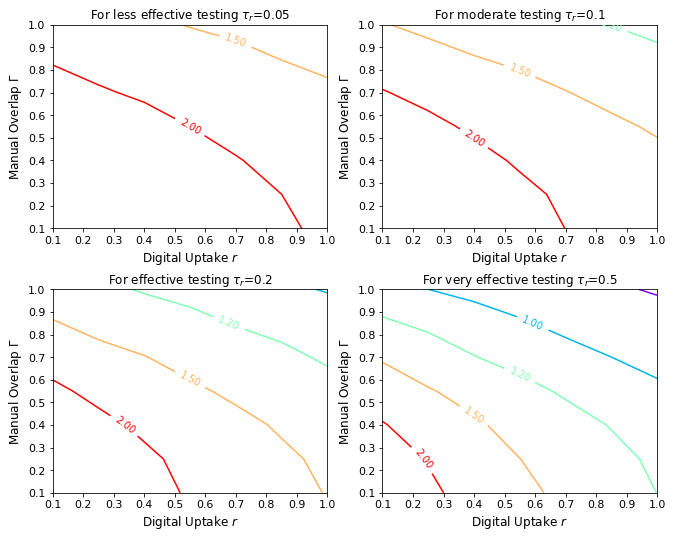

In [68]:
metric = 'r-eff'
key_to_plot = 'mean'
err = 'std'
ci = True
scale_ci = 1.96
import numpy as np
import math
%matplotlib inline

sts10 = ali[1]
sts20 = ali[2]

contour = True
projection = {} if contour else {'projection':'3d'}

import matplotlib.pyplot as plt
uptakes = overlaps = sorted(sts10.keys())
tauts = [.2]
taurs = [.05, .1, .2, .5]
fig, ax = plt.subplots(2, 2, figsize=(12, 13), subplot_kw=projection)
fig.subplots_adjust(top=.5, bottom=0, left=.5, right=1.2, hspace=0.3)
colors = plt.cm.rainbow(np.linspace(0, 1, len(tauts)))
# ax[0].set_yscale('log')

X, Y = np.meshgrid(uptakes, overlaps)

taut_forced = 0.1

test_type = {0.05: 'less effective', 0.1: 'moderate', 0.2: 'effective', 0.5: 'very effective'}

for i, taur in enumerate(taurs):
    rate0_10 = sts10[1][1][0][taur][metric][0][key_to_plot]
    std_10 = sts10[1][1][0][taur][metric][0][err]
    
    for t, taut in enumerate(sorted(tauts)):
        if taut == 0 or taut == .05:
            continue
        taut = taut_forced if taut_forced else taut
        to_plot = []
        to_plot_20 = []
        error = []
        error_20 = []
        for uptake in uptakes:
            for overlap in overlaps:
    #         try:
                item = sts10[uptake][1][taut][taur][metric][0]
                item_20 = sts20[uptake][overlap][taut][taur][metric][0]
                to_plot.append(utils.r_from_growth(item[key_to_plot]))
                to_plot_20.append(utils.r_from_growth(item_20[key_to_plot]))
                error.append(item[err])
                error_20.append(item_20[err])
    #         except:
    #             pass
        to_plot_20 = np.array(to_plot_20).reshape(X.shape[0], X.shape[1])
    #         error = np.array(error)
    #         error_20 = np.array(error_20)
    #         if ci:
    #             error = scale_ci * error / math.sqrt(50 * 15)
    #             error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
    #         if k == 2:
    #             ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
    #             ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].legend(loc='lower right', bbox_to_anchor=(0.5, 0.02, 0.5, 0.5), prop={'size': 10}, frameon=False)

        j = i // 2
        l = i % 2
        
        if not contour:
            surf = ax[j][l].plot_surface(X, Y, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[t])
            surf._facecolors2d = surf._facecolor3d
            surf._edgecolors2d = surf._edgecolor3d
        else:
            taut = .5
            levels = [.8, 1, 1.2, 1.5, 2]
            colors = plt.cm.rainbow(np.linspace(0, 1, len(levels)))
            CS=ax[j][l].contour(X, Y, to_plot_20, levels=levels, colors=colors)
            ax[j][l].clabel(CS, fontsize=10, inline=1, fmt='%0.2f')
            
        ax[j][l].set_title('For ' + test_type[taur] + r' testing $\tau_r$='+str(taur))
    #     ax[j][l]._facecolors2d = ax[j][l]._facecolor3d
    #     ax[j][l]._edgecolors2d = ax[j][l]._edgecolor3d
    #             ax[i][k].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
        ax[j][l].tick_params(axis='both', which='major', labelsize=11)
#         ax[j][l].legend(loc='upper right', prop={'size': 10}, frameon=False)
    #     ax[j][l].set_ylim(-50, 1000)
    #     ax[j][l].set_ylim(-50, 1000)
        ax[j][l].set_xlabel(r'Digital Uptake $r$', fontsize=12)
        ax[j][l].set_ylabel(r'Manual Overlap $\Gamma$', fontsize=12)
        ax[j][l].set_xticks(np.arange(min(uptakes), max(uptakes)+.1, .1))
#         ax[j][l].set_zlabel(r'$R_{eff}$ during Week 1')
#         ax[j][l].set_zlim(0, 6)
# plt.savefig('fig/triad-false-pos.pdf', format='pdf', bbox_inches = 'tight')
# plt.savefig('fig/triad-pareto-2d.pdf', format='pdf', bbox_inches = 'tight')

In [43]:
plt.savefig('fig/triad-pareto-2d.pdf', format='pdf', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

In [25]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [13]:
metric = 'r-eff'
key_to_plot = 'mean'
err = 'std'
method = 'exp'
ci = True
scale_ci = 1.96
import numpy as np
import math
import lib.utils as utils
utils.rel(utils)
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib widget

sts10 = al[1]
sts20 = al[2]

contour = False
projection = {} if contour else {'projection':'3d'}
figs_on_len = 4 if contour else 2

import matplotlib.pyplot as plt
uptakes = overlaps = sorted(sts10.keys())
tauts = [.2, .5] if contour else [.1, .2, .5]
taurs = [.05, .1, .2, .5]
fig, ax = plt.subplots(figs_on_len, 2, figsize=(12, 9), subplot_kw=projection)
fig.subplots_adjust(top=.95, bottom=0, left=0, right=.8, hspace=0.2, wspace=.1)
colors = plt.cm.rainbow(np.linspace(0, 1, 3))
# plt.patch.set_facecolor('lightgrey')


X, Y = np.meshgrid(uptakes, overlaps)

test_type = {0.05: 'Less effective', 0.1: 'Moderate', 0.2: 'Effective', 0.5: 'Very effective'}
tr_type = {.1: 'less effective', .2: 'moderate', .5: 'efficient'}

for i, taur in enumerate(taurs):
    rate0_10 = sts10[1][1][0][taur][metric][0][key_to_plot]
    std_10 = sts10[1][1][0][taur][metric][0][err]

    for t, taut in enumerate(sorted(tauts)):
        if taut == 0 or taut == .05:
            continue
        to_plot = []
        to_plot_20 = []
        error = []
        error_20 = []
        for uptake in uptakes:
            for overlap in overlaps:
    #         try:
                item = sts10[uptake][1][taut][taur][metric][0]
                item_20 = sts20[uptake][overlap][taut][taur][metric][0]
                to_plot.append(utils.r_from_growth(item[key_to_plot], method))
                to_plot_20.append(utils.r_from_growth(item_20[key_to_plot], method))
                error.append(item[err])
                error_20.append(item_20[err])
    #         except:
    #             pass
        to_plot_20 = np.array(to_plot_20).reshape(X.shape[0], X.shape[1])
    #         error = np.array(error)
    #         error_20 = np.array(error_20)
    #         if ci:
    #             error = scale_ci * error / math.sqrt(50 * 15)
    #             error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
    #         if k == 2:
    #             ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
    #             ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].legend(loc='lower right', bbox_to_anchor=(0.5, 0.02, 0.5, 0.5), prop={'size': 10}, frameon=False)

        
        if not contour:
            j = int(i / 2)
            l = int(i % 2)
            surf = ax[j][l].plot_surface(X, Y, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[t], alpha=.8)
            surf._facecolors2d = surf._facecolor3d
            surf._edgecolors2d = surf._edgecolor3d
            ax[j][l].set_zlabel(r'$R$ during Week 1')
            ax[j][l].set_zlim(0, 3.2)
        else:
            j = i
            l = t
            levels = [.8, 1, 1.2, 1.5, 1.8, 2]
            colors = plt.cm.rainbow(np.linspace(0, 1, len(levels)))
            CS=ax[j][l].contour(X, Y, to_plot_20, levels=levels, colors=colors)
            ax[j][l].clabel(CS, fontsize=10, inline=1, fmt='%0.2f')
            ax[j][l].set_xticks(np.arange(min(uptakes), max(uptakes)+.1, .1))
            
        title = test_type[taur] + r' testing $\tau_r$='+str(taur)
        if contour: title += "; " + tr_type[taut] + r' $\tau_t$=' + str(taut)
        ax[j][l].set_title(title, fontsize=14)
        ax[j][l].tick_params(axis='both', which='major', labelsize=11)
        ax[j][l].legend(loc='upper right', prop={'size': 10}, frameon=False,bbox_to_anchor = (0,0,1,1))
    #     ax[j][l].set_ylim(-50, 1000)
    #     ax[j][l].set_ylim(-50, 1000)
        ax[j][l].set_xlabel(r'Digital Uptake $r$', fontsize=12)
        ax[j][l].set_ylabel(r'Manual Overlap $\Gamma$', fontsize=12)

from matplotlib import style
# style.use('seaborn-deep')
plt.show()
# plt.savefig('fig/triad-pareto-3d.pdf', format='pdf', bbox_inches = 'tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# 

In [15]:
plt.savefig('fig/triad-pareto-3d.pdf', format='pdf', bbox_inches = 'tight')

In [103]:
sts20[uptake][overlap][taut][taur][metric][0]

{'mean': 4.15,
 'std': 0.28,
 'whislo': 3.38,
 'q1': 3.94,
 'med': 4.15,
 'q3': 4.33,
 'whishi': 4.84,
 'mean_wo': 4.15,
 'std_wo': 0.28}

In [257]:
utils.r_from_growth(sts10[1][1][0][.05][metric][0][key_to_plot])

3.228848333405388

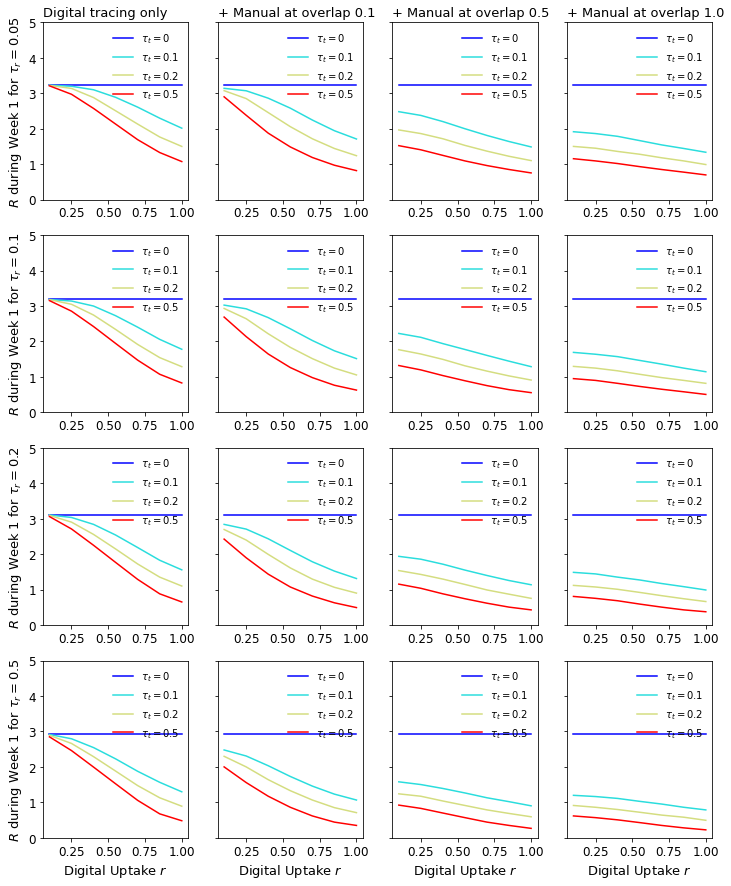

In [255]:
metric = 'r-eff'
key_to_plot = 'mean'
err = 'std'
ci = True
scale_ci = 1.96
import lib.utils as utils

overlaps = [.1, .55, 1]

sts10 = al[1]
sts20 = al[2]

import matplotlib.pyplot as plt
uptakes = sorted(sts20.keys())
tauts = [.05, .1, .2, .5]
taurs = [.05, .1, .2, .5]
fig, ax = plt.subplots(4, 4, figsize=(12, 15))
colors = plt.cm.rainbow(np.linspace(0, 1, len(tauts)))
# ax[0].set_yscale('log')

for k, overlap in enumerate(overlaps):
    k += 1
    for i, taur in enumerate(taurs):
        rate0_10 = utils.r_from_growth(sts10[1][1][0][taur][metric][0][key_to_plot])
        std_10 = sts10[1][1][0][taur][metric][0][err]
#         rate0_20 = utils.r_from_growth(sts20[1][overlap][0][taur][metric][0][key_to_plot])
#         std_20 = sts20[1][overlap][0][taur][metric][0][err]

        if ci:
            std_10 *= scale_ci / math.sqrt(50 * 15)
            std_20 *= scale_ci / math.sqrt(50 * 15)
        
        if not i:
            ax[i][0].set_title("Digital tracing only", fontsize=13, loc='left')
            ax[i][k].set_title("+ Manual at overlap " + str(math.floor(overlap*10)/10), fontsize=13, loc='left')
        # to_plot[to_plot < 1] = 1
        array_0 = np.ones(len(uptakes)) * rate0_10
        array_20 = np.ones(len(uptakes)) * rate0_10
        
        if k == 2:
            ax[i][0].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
#             ax[i][0].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)
        ax[i][k].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
#         ax[i][k].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)


        for j, taut in enumerate(sorted(tauts)):
            if taut == 0 or taut == .05:
                continue
            to_plot = []
            to_plot_20 = []
            error = []
            error_20 = []
            for uptake in uptakes:
                if taut == 0:
                    continue
        #         try:
                item = sts10[uptake][1][taut][taur][metric][0]
                item_20 = sts20[uptake][overlap][taut][taur][metric][0]
                to_plot.append(utils.r_from_growth(item[key_to_plot]))
                to_plot_20.append(utils.r_from_growth(item_20[key_to_plot]))
                error.append(item[err])
                error_20.append(item_20[err])
        #         except:
        #             pass
            error = np.array(error)
            error_20 = np.array(error_20)
            if ci:
                error = scale_ci * error / math.sqrt(50 * 15)
                error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
            if k == 2:
                ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
#                 ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
                ax[i][0].legend(loc='upper right', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), prop={'size': 10}, frameon=False)
                
            ax[i][k].plot(uptakes, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[j])
#             ax[i][k].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
            ax[i][k].legend(loc='upper right', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), prop={'size': 10}, frameon=False)
            for l in range(4):
                ax[-1][l].set_xlabel(r'Digital Uptake $r$', fontsize=13)
            ax[i][0].set_ylabel(r'$R$ during Week 1 for $\tau_r=$' + str(taur), fontsize=13)
            ax[i][0].set_ylim(0, 4)
            ax[i][k].set_ylim(0, 4)
            ax[i][k].tick_params(labelleft=False)
            ax[i][0].set_yticks(np.arange(0, 6, 1.0))
            ax[i][k].set_yticks(np.arange(0, 6, 1.0))
# ax[0].set_ylim(-120, 300)
# ax[1].set_ylim(-120, 300)
plt.savefig('fig/triad-reff.pdf', format='pdf', bbox_inches = 'tight')

In [235]:
sts20[1].keys()

dict_keys([0.25, 0.4, 0.55, 0.7, 0.85, 1.0, 0.1, 0.5])

In [240]:
sts20[1][.7][0][.05][metric][0][key_to_plot]

5.4

In [228]:
utils.r_from_growth(sts20[1][1][0][.05][metric][0][key_to_plot])

3.1927665821627813

In [178]:
utils.r_from_growth(.33)

0.21026710050833836

In [176]:
math.log(.5)

-0.6931471805599453

<h3> The growth rate

In [81]:
metric = 'growth'
sts20[1][overlap][0][taur][metric][0][key_to_plot]

3.11

<h1> Results for Social Evolution

In [1]:
%load_ext autoreload
%autoreload 2
import os
try:
    os.chdir('D:\OneDrive - University of Southampton\PhD\Contact')
except:
    os.chdir(r'C:\Users\ar5g15\OneDrive - University of Southampton\PhD\Contact')
import lib.utils as ut
ut.rel(ut)
resi = ut.process_json_results('data/run/social_slurm/', overlap_to_capture='overlap_two')

In [2]:
al = resi[.2] # prob asymptomatic 0.2
al_5 = resi[.5] # prob asymptomatic 0.5

In [4]:
al.keys()

dict_keys([1, 2])

In [5]:
al_5[2].keys()

dict_keys([0.25, 0.4, 0.55, 0.7, 0.85, 1.0, 0.1])

In [75]:
sts10[uptake][1][taut][taur][metric][time_id][key_to_plot]

0.03

In [ ]:
sts10[1][1][0][taur][metric][time_id][key_to_plot]

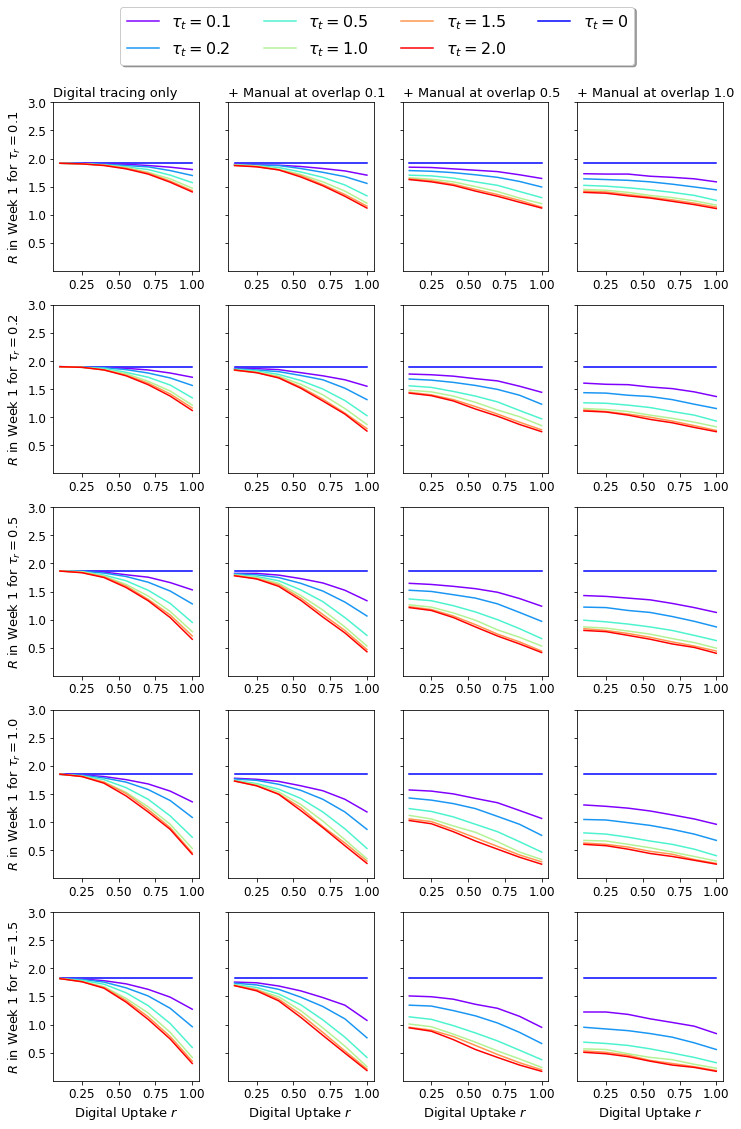

In [137]:
import numpy as np
import math
metric = 'growth'
key_to_plot = 'mean'
err = 'std'
ci = True
scale_ci = 1.96
import lib.utils as utils
from collections import deque

time_id = 0

overlaps = [.1, .55, 1]

sts10 = al[1]
sts20 = al[2]

import matplotlib.pyplot as plt
uptakes = sorted(sts20.keys())
tauts = [.1, .2, .5, 1.0, 1.5, 2.0]
taurs = [.1, .2, .5, 1., 1.5]
fig, ax = plt.subplots(5, 4, figsize=(12, 18), sharey=True)
colors = plt.cm.rainbow(np.linspace(0, 1, len(tauts)))
# ax[0].set_yscale('log')

for k, overlap in enumerate(overlaps):
    k += 1
    for i, taur in enumerate(taurs):
        rate0_10 = utils.r_from_growth(sts10[1][1][0][taur][metric][time_id][key_to_plot])
        std_10 = sts10[1][1][0][taur][metric][time_id][err]
#         rate0_20 = utils.r_from_growth(sts20[1][overlap][0][taur][metric][0][key_to_plot])

        if ci:
            std_10 *= scale_ci / math.sqrt(1000)
        
        if not i:
            ax[i][0].set_title("Digital tracing only", fontsize=13, loc='left')
            ax[i][k].set_title("+ Manual at overlap " + str(math.floor(overlap*10)/10), fontsize=13, loc='left')
        # to_plot[to_plot < 1] = 1
        array_0 = np.ones(len(uptakes)) * rate0_10
        array_20 = np.ones(len(uptakes)) * rate0_10
        
        if k == 2:
            ax[i][0].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
#             ax[i][0].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)
        ax[i][k].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
#         ax[i][k].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)


        for j, taut in enumerate(sorted(tauts)):
            if taut == 0 or taut == .05:
                continue
            to_plot = []
            to_plot_20 = []
            error = []
            error_20 = []
            for uptake in uptakes:
                if taut == 0:
                    continue
        #         try:
                item = sts10[uptake][1][taut][taur][metric][time_id]
                item_20 = sts20[uptake][overlap][taut][taur][metric][time_id]
                to_plot.append(utils.r_from_growth(item[key_to_plot]))
                to_plot_20.append(utils.r_from_growth(item_20[key_to_plot]))
                error.append(item[err])
                error_20.append(item_20[err])
        #         except:
        #             pass
            error = np.array(error)
            error_20 = np.array(error_20)
            if ci:
                error = scale_ci * error / math.sqrt(1000)
                error_20 = scale_ci * error_20 / math.sqrt(1000)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
            if k == 2:
                ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
#                 ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
#                 ax[i][0].legend(loc='upper right', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), prop={'size': 10}, frameon=False)
                
            ax[i][k].plot(uptakes, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[j])
#             ax[i][k].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
#             ax[i][k].legend(loc='upper right', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), prop={'size': 10}, frameon=False)
            for l in range(4):
                ax[-1][l].set_xlabel(r'Digital Uptake $r$', fontsize=13)
            ax[i][0].set_ylabel(r'$R$ in Week 1 for $\tau_r=$' + str(taur), fontsize=13)
            ax[i][0].set_ylim(0, 3)
            ax[i][k].set_ylim(0, 3)
            ax[i][k].tick_params(labelleft=False)
            ax[i][0].set_yticks(np.arange(0.5, 3.5, .5))
            ax[i][k].set_yticks(np.arange(0.5, 3.5, .5))
            
handles, labels = ax[-1][-1].get_legend_handles_labels()
handles, labels = deque(handles), deque(labels)
handle0, label0 = handles.popleft(), labels.popleft()
handles.append(handle0)
labels.append(label0)
            
fig.legend(handles, labels, fontsize=16, fancybox=True, ncol=4, shadow=True, loc='upper center', bbox_to_anchor=(0.5, 1, 0, -.04))
# ax[0].set_ylim(-120, 300)
# ax[1].set_ylim(-120, 300)
plt.savefig('fig/social-reff.pdf', format='pdf', bbox_inches = 'tight')

In [23]:
sts10[1][1][0][.5][metric][time_id][key_to_plot]

7.27

In [21]:
sts20[1][1][0][2][metric][time_id][key_to_plot]

defaultdict(<function lib.utils.process_json_results.<locals>.<lambda>()>, {})

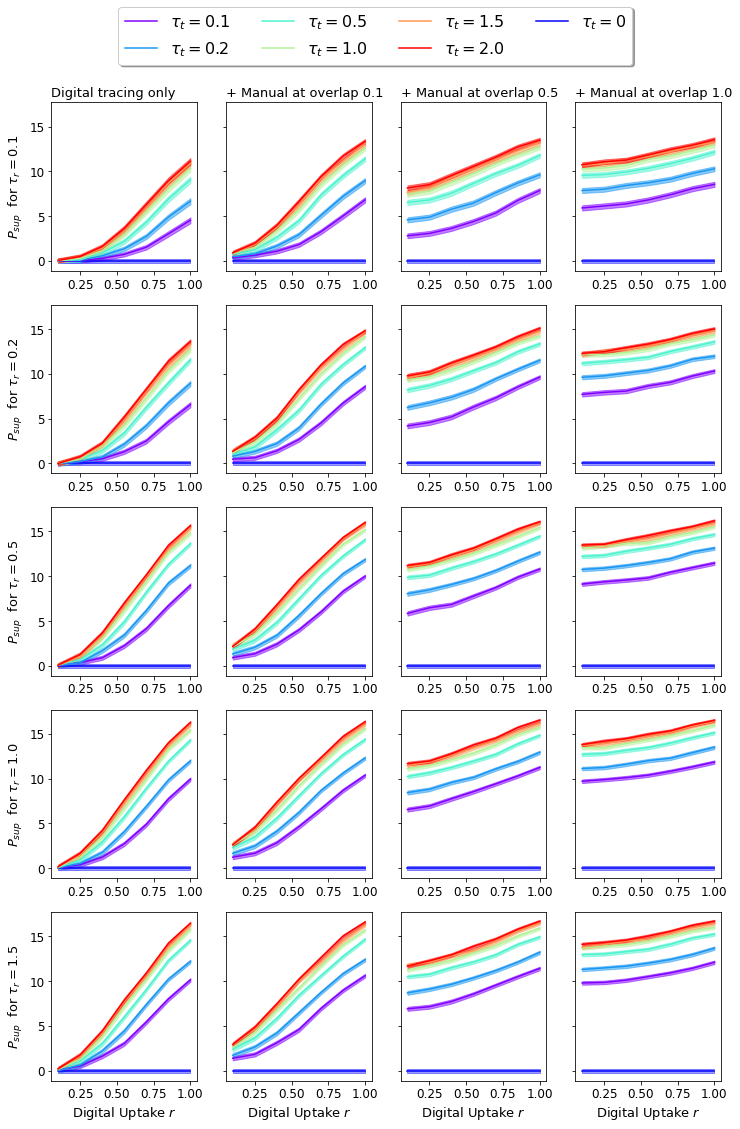

In [136]:
metric = 'average-max-infected'
key_to_plot = 'mean'
err = 'std'
ci = True
scale_ci = 1.96
overlap = .55
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

overlaps = [.1, .55, 1]

sts10 = al[1]
sts20 = al[2]

import matplotlib.pyplot as plt
uptakes = sorted(sts10.keys())
tauts = [.1, .2, .5, 1.0, 1.5, 2.0]
taurs = [.1, .2, .5, 1., 1.5]
fig, ax = plt.subplots(5, 4, figsize=(12, 18), sharey=True)
colors = plt.cm.rainbow(np.linspace(0, 1, len(tauts)))
# ax[0].set_yscale('log')

for k, overlap in enumerate(overlaps):
    k += 1
    for i, taur in enumerate(taurs):
        rate0_10 = sts10[1][1][0][taur][metric][key_to_plot]
        std_10 = sts10[1][1][0][taur][metric][err]

        if ci:
            std_10 *= scale_ci / math.sqrt(1000)
        
        if not i:
            ax[i][0].set_title("Digital tracing only", fontsize=13, loc='left')
            ax[i][k].set_title("+ Manual at overlap " + str(math.floor(overlap*10)/10), fontsize=13, loc='left')
        # to_plot[to_plot < 1] = 1
        array_0 = np.zeros(len(uptakes))
        if k == 2:
            ax[i][0].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
            ax[i][0].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)
        ax[i][k].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
        ax[i][k].fill_between(uptakes ,array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)


        for j, taut in enumerate(sorted(tauts)):
            if taut == 0 or taut == .05:
                continue
            to_plot = []
            to_plot_20 = []
            error = []
            error_20 = []
            for uptake in uptakes:
                if taut == 0:
                    continue
        #         try:
                item = sts10[uptake][1][taut][taur][metric]
                item_20 = sts20[uptake][overlap][taut][taur][metric]
                to_plot.append(- item[key_to_plot] + rate0_10)
                to_plot_20.append(- item_20[key_to_plot] + rate0_10)
                error.append(math.sqrt(item[err]**2 + std_10**2))
                error_20.append(math.sqrt(item_20[err]**2 + std_10**2))
        #         except:
        #             pass
            error = np.array(error)
            error_20 = np.array(error_20)
            if ci:
                error = scale_ci * error / math.sqrt(1000)
                error_20 = scale_ci * error_20 / math.sqrt(1000)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
            if k == 2:
                ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
                ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
                ax[i][0].tick_params(axis='both', which='major', labelsize=12)
#                 ax[i][0].legend(loc='lower right', bbox_to_anchor=(0.5, 0, 0.55, 1), prop={'size': 10}, frameon=False)
                
            ax[i][k].plot(uptakes, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[j])
            ax[i][k].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
#             ax[i][k].legend(loc='lower right', bbox_to_anchor=(0.5, 0, 0.55, 1), prop={'size': 10}, frameon=False)
            for l in range(4):
                ax[-1][l].set_xlabel(r'Digital Uptake $r$', fontsize=13)
            ax[i][0].set_ylabel(r'$P_{sup}$  for $\tau_r=$' + str(taur), fontsize=13)
#             ax[i][0].set_ylim(-10, 1000)
#             ax[i][k].set_ylim(-10, 1000)
            ax[i][k].tick_params(labelleft=False)
    
handles, labels = ax[-1][-1].get_legend_handles_labels()
handles, labels = deque(handles), deque(labels)
handle0, label0 = handles.popleft(), labels.popleft()
handles.append(handle0)
labels.append(label0)
            
fig.legend(handles, labels, fontsize=16, fancybox=True, ncol=4, shadow=True, loc='upper center', bbox_to_anchor=(0.5, 1, 0, -.04))
# ax[0].set_ylim(-120, 300)
# ax[1].set_ylim(-120, 300)
plt.savefig('fig/social-peak-sup.pdf', format='pdf', bbox_inches = 'tight')

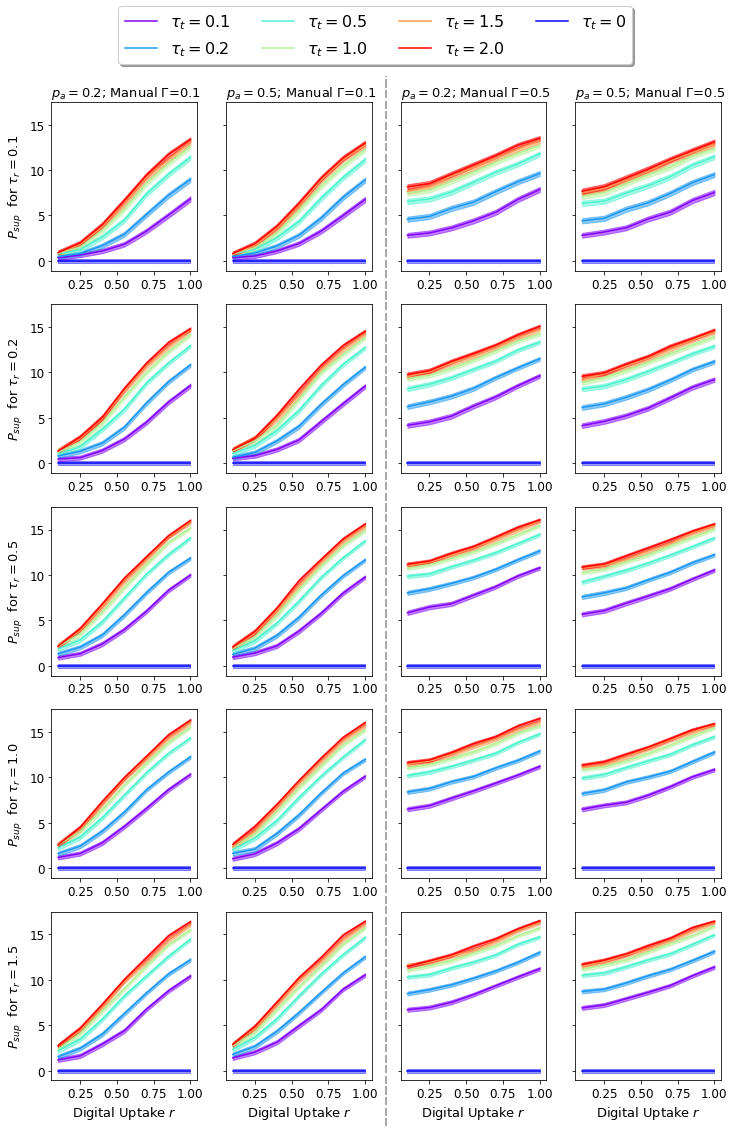

In [213]:
metric = 'average-max-infected'
key_to_plot = 'mean'
err = 'std'
ci = True
scale_ci = 1.96
overlap = .55
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

overlaps = [.1, .55]

sts10 = al[2]
sts20 = al_5[2]

import matplotlib.pyplot as plt
uptakes = sorted(sts10.keys())
tauts = [.1, .2, .5, 1.0, 1.5, 2.0]
taurs = [.1, .2, .5, 1., 1.5]
fig, ax = plt.subplots(5, 4, figsize=(12, 18), sharey=True)
colors = plt.cm.rainbow(np.linspace(0, 1, len(tauts)))
# ax[0].set_yscale('log')

for k, overlap in enumerate(overlaps):
    k *= 2
    for i, taur in enumerate(taurs):
        rate0_10 = sts10[1][1][0][taur][metric][key_to_plot]
        std_10 = sts10[1][1][0][taur][metric][err]
        rate0_20 = sts20[1][1][0][taur][metric][key_to_plot]
        std_20 = sts20[1][1][0][taur][metric][err]
        
        if ci:
            std_10 *= scale_ci / math.sqrt(1000)
            std_20 *= scale_ci / math.sqrt(1000)
        
        if not i:
            ax[i][k].set_title(f"$p_a=0.2$; Manual $\Gamma$=" + str(math.floor(overlap*10)/10), fontsize=13, loc='left')
            ax[i][k + 1].set_title(f"$p_a=0.5$; Manual $\Gamma$=" + str(math.floor(overlap*10)/10), fontsize=13, loc='left')
        # to_plot[to_plot < 1] = 1
        array_0 = np.zeros(len(uptakes))

        ax[i][k].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
        ax[i][k].fill_between(uptakes, array_0 - std_10, array_0 + std_10, color='blue', alpha=.4)
        ax[i][k + 1].plot(uptakes, array_0, color='blue', label=r'$\tau_t=0$')
        ax[i][k + 1].fill_between(uptakes, array_0 - std_20, array_0 + std_20, color='blue', alpha=.4)


        for j, taut in enumerate(sorted(tauts)):
            if taut == 0 or taut == .05:
                continue
            to_plot_10 = []
            to_plot_20 = []
            error_10 = []
            error_20 = []
            for uptake in uptakes:
                if taut == 0:
                    continue
        #         try:
                item = sts10[uptake][overlap][taut][taur][metric]
                item_20 = sts20[uptake][overlap][taut][taur][metric]
                to_plot_10.append(- item[key_to_plot] + rate0_10)
                to_plot_20.append(- item_20[key_to_plot] + rate0_20)
                error_10.append(math.sqrt(item[err]**2 + std_10**2))
                error_20.append(math.sqrt(item_20[err]**2 + std_20**2))
        #         except:
        #             pass
            error_10 = np.array(error_10)
            error_20 = np.array(error_20)
            if ci:
                error_10 = scale_ci * error_10 / math.sqrt(1000)
                error_20 = scale_ci * error_20 / math.sqrt(1000)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
#                 ax[i][0].legend(loc='lower right', bbox_to_anchor=(0.5, 0, 0.55, 1), prop={'size': 10}, frameon=False)
                
            ax[i][k].plot(uptakes, to_plot_10, label=r'$\tau_t = $'+str(taut), color=colors[j])
            ax[i][k].fill_between(uptakes, to_plot_10-error_10, to_plot_10+error_10, color=colors[j], alpha=.5)
            ax[i][k + 1].plot(uptakes, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[j])
            ax[i][k + 1].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
            
            ax[i][k].tick_params(axis='both', which='major', labelsize=12)
            ax[i][k + 1].tick_params(axis='both', which='major', labelsize=12)
#             ax[i][k].legend(loc='lower right', bbox_to_anchor=(0.5, 0, 0.55, 1), prop={'size': 10}, frameon=False)
            for l in range(4):
                ax[-1][l].set_xlabel(r'Digital Uptake $r$', fontsize=13)
            ax[i][0].set_ylabel(r'$P_{sup}$  for $\tau_r=$' + str(taur), fontsize=13)
#             ax[i][0].set_ylim(-10, 1000)
#             ax[i][k].set_ylim(-10, 1000)
#             ax[i][k].tick_params(labelleft=False)

            ax[i][k].plot([0.512, 0.512], [.09, .9], '--', color='darkgrey', lw=2,transform=fig.transFigure, clip_on=False)
    
handles, labels = ax[-1][-1].get_legend_handles_labels()
handles, labels = deque(handles), deque(labels)
handle0, label0 = handles.popleft(), labels.popleft()
handles.append(handle0)
labels.append(label0)

# Draw a horizontal lines at those coordinates
# for y in ys:
#     line = plt.Line2D([1,0],[y,y], transform=fig.transFigure, color="black")
#     fig.add_artist(line)
            
fig.legend(handles, labels, fontsize=16, fancybox=True, ncol=4, shadow=True, loc='upper center', bbox_to_anchor=(0.5, 1, 0, -.04))
# ax[0].set_ylim(-120, 300)
# ax[1].set_ylim(-120, 300)
plt.savefig('fig/social-pa-peak-sup.pdf', format='pdf', bbox_inches = 'tight')

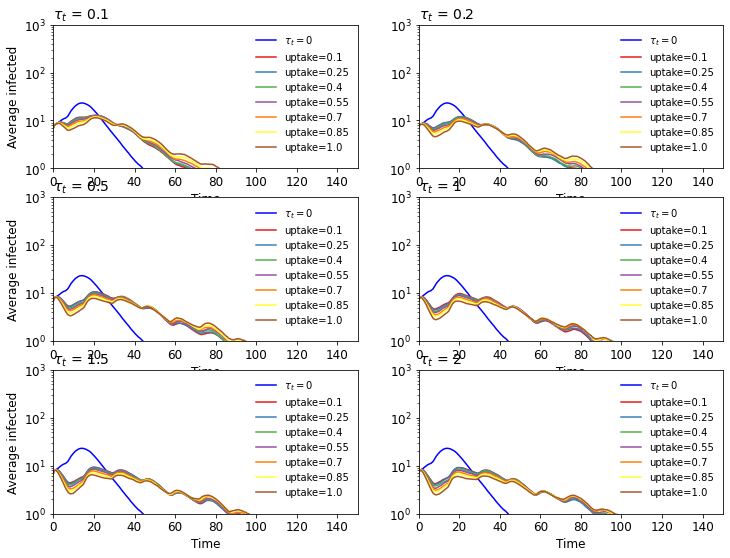

In [16]:
import matplotlib.pyplot as plt
key = 'mean'
err = 'std'
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
# plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Spectral(np.linspace(0, 1, 10), alpha=1))
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.get_cmap('Set1').colors)
pa = .2
tauts = [.1, .2, .5, 1, 1.5, 2]
uptake = 1
sts = sts20
uptakes = sorted(sts.keys())
taur = .5
fig, ax = plt.subplots(3, 2, figsize=(12, 9))
# ax[0][0].set_yscale('log')
# ax[0][0].set_title('Tracing rate=' + str(0))
# ax[0][0].set_xlim(0, 150)
# ax[0][0].plot(sts[uptake][1][0][taur]['time'], [i[key] for i in sts[uptake][1][0][taur]['average-infected']], label=r'$\tau_t=0$', c='b')
# ax[0][0].set_ylabel('average-infected')
# ax[0][0].set_ylim(1, 1000)

weigh = 1

for k, taut in enumerate(tauts):
    if taut == 0:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_ylim(1, 1000)
    ax[i][j].set_xlabel('Time', fontsize=12)
    ax[i][0].set_ylabel('Average infected', fontsize=12)
    ax[i][j].set_xlim(0,150)
    ax[i][j].set_yscale('log')
    ax[i][j].plot(sts10[1][1][0][2]['time'], [i[key] for i in sts10[uptake][1][0][2]['average-infected']], label=r'$\tau_t=0$', c='b')
    ax[i][j].set_title(r'$\tau_t$ = ' + str(taut), loc='left', fontsize=14)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    ax[i][j].tick_params(axis='both', which='major', labelsize=12)
    for uptake in uptakes:
        to_plot = [i[key] for i in sts[uptake][1][taut][taur]['average-infected']]
#         to_plot[to_plot<1] = 1
        ax[i][j].plot(sts[uptake][1][taut][taur]['time'], to_plot, label='uptake='+str(uptake))
    ax[i][j].legend(loc='upper right', prop={'size': 10}, frameon=False)
# plt.savefig('fig/uptake-evol.pdf', format='pdf', bbox_inches = 'tight')

In [47]:
sts[1][1][0][.5]['time']

dict_keys([0.1, 0.2, 0.5, 1.0, 1.5, 2.0, 0])

In [ ]:
sts[.4][1][.5][.5]['average-infected']

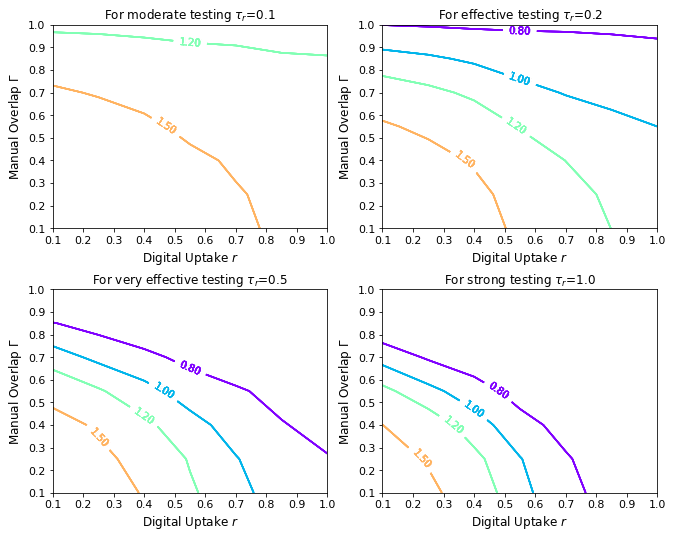

In [5]:
metric = 'growth'
key_to_plot = 'mean'
err = 'std'
ci = True
scale_ci = 1.96
import numpy as np
import math
%matplotlib inline

sts10 = al[1]
sts20 = al[2]

contour = True
projection = {} if contour else {'projection':'3d'}

import matplotlib.pyplot as plt
uptakes = overlaps = sorted(sts10.keys())
tauts = [.1, .2, .5, 1, 1.5, 2.0]
taurs = [.1, .2, .5, 1.]
fig, ax = plt.subplots(2, 2, figsize=(12, 13), subplot_kw=projection)
fig.subplots_adjust(top=.5, bottom=0, left=.5, right=1.2, hspace=0.3)
colors = plt.cm.rainbow(np.linspace(0, 1, len(tauts)))
# ax[0].set_yscale('log')

X, Y = np.meshgrid(uptakes, overlaps)

taut_forced = 1.5

test_type = {0.1: 'moderate', 0.1: 'moderate', 0.2: 'effective', 0.5: 'very effective', 1: 'strong'}

for i, taur in enumerate(taurs):
    rate0_10 = sts10[1][1][0][taur][metric][0][key_to_plot]
    std_10 = sts10[1][1][0][taur][metric][0][err]
    
    for t, taut in enumerate(sorted(tauts)):
        if taut == 0 or taut == .05:
            continue
        taut = taut_forced if taut_forced else taut
        to_plot = []
        to_plot_20 = []
        error = []
        error_20 = []
        for uptake in uptakes:
            for overlap in overlaps:
    #         try:
                item = sts10[uptake][1][taut][taur][metric][0]
                item_20 = sts20[uptake][overlap][taut][taur][metric][0]
                to_plot.append(utils.r_from_growth(item[key_to_plot]))
                to_plot_20.append(utils.r_from_growth(item_20[key_to_plot]))
                error.append(item[err])
                error_20.append(item_20[err])
    #         except:
    #             pass
        to_plot_20 = np.array(to_plot_20).reshape(X.shape[0], X.shape[1])
    #         error = np.array(error)
    #         error_20 = np.array(error_20)
    #         if ci:
    #             error = scale_ci * error / math.sqrt(50 * 15)
    #             error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
    #         if k == 2:
    #             ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
    #             ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].legend(loc='lower right', bbox_to_anchor=(0.5, 0.02, 0.5, 0.5), prop={'size': 10}, frameon=False)

        j = i // 2
        l = i % 2
        
        if not contour:
            surf = ax[j][l].plot_surface(X, Y, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[t])
            surf._facecolors2d = surf._facecolor3d
            surf._edgecolors2d = surf._edgecolor3d
        else:
            taut = .5
            levels = [.8, 1, 1.2, 1.5, 2]
            colors = plt.cm.rainbow(np.linspace(0, 1, len(levels)))
            CS=ax[j][l].contour(X, Y, to_plot_20, levels=levels, colors=colors)
            ax[j][l].clabel(CS, fontsize=10, inline=1, fmt='%0.2f')
            
        ax[j][l].set_title('For ' + test_type[taur] + r' testing $\tau_r$='+str(taur))
    #     ax[j][l]._facecolors2d = ax[j][l]._facecolor3d
    #     ax[j][l]._edgecolors2d = ax[j][l]._edgecolor3d
    #             ax[i][k].fill_between(uptakes, to_plot_20-error_20, to_plot_20+error_20, color=colors[j], alpha=.5)
        ax[j][l].tick_params(axis='both', which='major', labelsize=11)
#         ax[j][l].legend(loc='upper right', prop={'size': 10}, frameon=False)
    #     ax[j][l].set_ylim(-50, 1000)
    #     ax[j][l].set_ylim(-50, 1000)
        ax[j][l].set_xlabel(r'Digital Uptake $r$', fontsize=12)
        ax[j][l].set_ylabel(r'Manual Overlap $\Gamma$', fontsize=12)
        ax[j][l].set_xticks(np.arange(min(uptakes), max(uptakes)+.1, .1))
#         ax[j][l].set_zlabel(r'$R_{eff}$ during Week 1')
#         ax[j][l].set_zlim(0, 6)
# plt.savefig('fig/triad-false-pos.pdf', format='pdf', bbox_inches = 'tight')
# plt.savefig('fig/triad-pareto-2d.pdf', format='pdf', bbox_inches = 'tight')

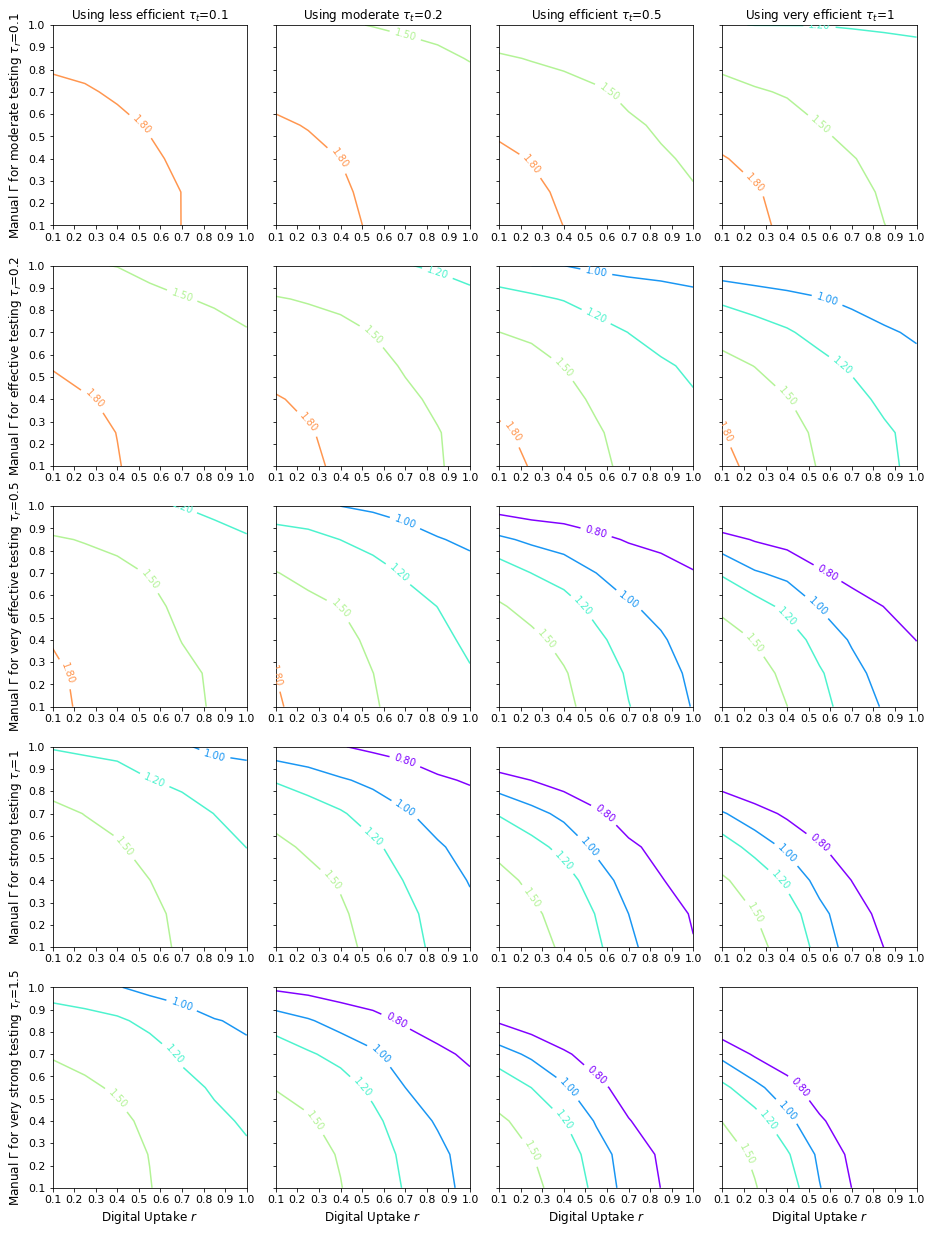

In [218]:
metric = 'growth'
key_to_plot = 'mean'
err = 'std'
method = 'exp'
ci = True
scale_ci = 1.96
import numpy as np
import math
import lib.utils as utils
utils.rel(utils)
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

sts10 = al[1]
sts20 = al[2]

contour = True
projection = {} if contour else {'projection':'3d'}
figs_on_len = 5 if contour else 2

import matplotlib.pyplot as plt
uptakes = overlaps = sorted(sts10.keys())
tauts = [.1, .2, .5, 1] if contour else [.1, .2, .5]
taurs = [.1, .2, .5, 1, 1.5]
fig, ax = plt.subplots(figs_on_len, 4, figsize=(15, 17), sharey=True, subplot_kw=projection)
fig.subplots_adjust(top=.95, bottom=0, left=0, right=.8, hspace=0.2, wspace=.15)
colors = plt.cm.rainbow(np.linspace(0, 1, 3))
# plt.patch.set_facecolor('lightgrey')


X, Y = np.meshgrid(uptakes, overlaps)

test_type = {0.05: 'Less effective', 0.1: 'Moderate', 0.2: 'Effective', .5: 'Very effective', 1: 'Strong', 1.5: 'Very strong'}
tr_type = {.1: 'less efficient', .2: 'moderate', .5: 'efficient', 1: 'very efficient'}

for i, taur in enumerate(taurs):
    rate0_10 = sts10[1][1][0][taur][metric][0][key_to_plot]
    std_10 = sts10[1][1][0][taur][metric][0][err]

    for t, taut in enumerate(sorted(tauts)):
        if taut == 0 or taut == .05:
            continue
        to_plot = []
        to_plot_20 = []
        error = []
        error_20 = []
        for uptake in uptakes:
            for overlap in overlaps:
    #         try:
                item = sts10[uptake][1][taut][taur][metric][0]
                item_20 = sts20[uptake][overlap][taut][taur][metric][0]
                to_plot.append(utils.r_from_growth(item[key_to_plot], method))
                to_plot_20.append(utils.r_from_growth(item_20[key_to_plot], method))
                error.append(item[err])
                error_20.append(item_20[err])
    #         except:
    #             pass
        to_plot_20 = np.array(to_plot_20).reshape(X.shape[0], X.shape[1])
    #         error = np.array(error)
    #         error_20 = np.array(error_20)
    #         if ci:
    #             error = scale_ci * error / math.sqrt(50 * 15)
    #             error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
    #         if k == 2:
    #             ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
    #             ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].legend(loc='lower right', bbox_to_anchor=(0.5, 0.02, 0.5, 0.5), prop={'size': 10}, frameon=False)

        
        if not contour:
            j = int(i / 2)
            l = int(i % 2)
            surf = ax[j][l].plot_surface(X, Y, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[t], alpha=.8)
            surf._facecolors2d = surf._facecolor3d
            surf._edgecolors2d = surf._edgecolor3d
            ax[j][l].set_zlabel(r'$R$ during Week 1')
            ax[j][l].set_zlim(0, 3.2)
        else:
            j = i
            l = t
            levels = [.8, 1, 1.2, 1.5, 1.8, 2]
            colors = plt.cm.rainbow(np.linspace(0, 1, len(levels)))
            CS=ax[j][l].contour(X, Y, to_plot_20, levels=levels, colors=colors)
            ax[j][l].clabel(CS, fontsize=10, inline=1, fmt='%0.2f')
            ax[j][l].set_xticks(np.arange(min(uptakes), max(uptakes)+.1, .1))
            
        title = ''
        if contour: title += 'Using ' + tr_type[taut] + r' $\tau_t$=' + str(taut)
        ax[0][l].set_title(title, fontsize=12)
        ax[j][l].tick_params(axis='both', which='major', labelsize=11)
#         ax[j][l].legend(loc='upper right', prop={'size': 10}, frameon=False,bbox_to_anchor = (0,0,1,1))
    #     ax[j][l].set_ylim(-50, 1000)
    #     ax[j][l].set_ylim(-50, 1000)
        ax[-1][l].set_xlabel(r'Digital Uptake $r$', fontsize=12)
        ax[j][0].set_ylabel(fr'Manual $\Gamma$ for {test_type[taur].lower()} testing $\tau_r$={taur}', fontsize=12)
#         ax[1][l].tick_params(labelleft=False)

from matplotlib import style
# style.use('seaborn-deep')
# plt.show()
plt.savefig('fig/social-pareto-2d.pdf', format='pdf', bbox_inches = 'tight')

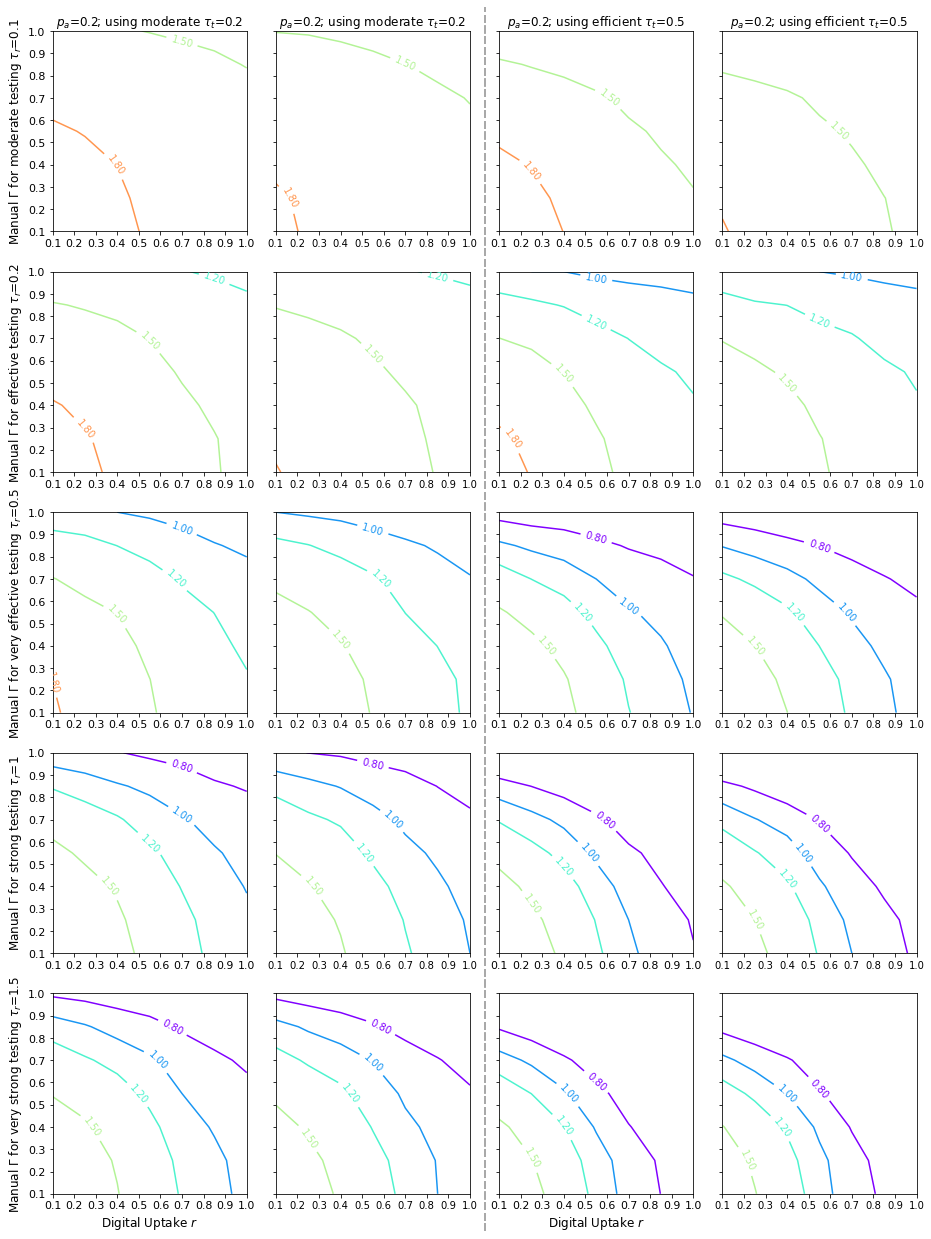

In [219]:
metric = 'growth'
key_to_plot = 'mean'
err = 'std'
method = 'exp'
ci = True
scale_ci = 1.96
import numpy as np
import math
import lib.utils as utils
utils.rel(utils)
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

sts10 = al[2]
sts20 = al_5[2]

contour = True
projection = {} if contour else {'projection':'3d'}
figs_on_len = 5 if contour else 2

import matplotlib.pyplot as plt
uptakes = overlaps = sorted(sts10.keys())
tauts = [.2, .5] if contour else [.1, .2, .5]
taurs = [.1, .2, .5, 1, 1.5]
fig, ax = plt.subplots(figs_on_len, 4, figsize=(15, 17), sharey=True, subplot_kw=projection)
fig.subplots_adjust(top=.95, bottom=0, left=0, right=.8, hspace=0.2, wspace=.15)
colors = plt.cm.rainbow(np.linspace(0, 1, 3))
# plt.patch.set_facecolor('lightgrey')


X, Y = np.meshgrid(uptakes, overlaps)

test_type = {0.05: 'Less effective', 0.1: 'Moderate', 0.2: 'Effective', .5: 'Very effective', 1: 'Strong', 1.5: 'Very strong'}
tr_type = {.1: 'less efficient', .2: 'moderate', .5: 'efficient', 1: 'very efficient'}

for i, taur in enumerate(taurs):
#     rate0_10 = sts10[1][1][0][taur][metric][0][key_to_plot]
#     std_10 = sts10[1][1][0][taur][metric][0][err]

    for t, taut in enumerate(sorted(tauts)):
        t *= 2
        if taut == 0 or taut == .05:
            continue
        to_plot = []
        to_plot_20 = []
        error = []
        error_20 = []
        for uptake in uptakes:
            for overlap in overlaps:
    #         try:
                item = sts10[uptake][overlap][taut][taur][metric][0]
                item_20 = sts20[uptake][overlap][taut][taur][metric][0]
                to_plot.append(utils.r_from_growth(item[key_to_plot], method))
                to_plot_20.append(utils.r_from_growth(item_20[key_to_plot], method))
                error.append(item[err])
                error_20.append(item_20[err])
    #         except:
    #             pass
        to_plot_10 = np.array(to_plot).reshape(X.shape[0], X.shape[1])
        to_plot_20 = np.array(to_plot_20).reshape(X.shape[0], X.shape[1])
    #         error = np.array(error)
    #         error_20 = np.array(error_20)
    #         if ci:
    #             error = scale_ci * error / math.sqrt(50 * 15)
    #             error_20 = scale_ci * error_20 / math.sqrt(50 * 15)
    #         ax[i][0].set_ylim(-20, 90)
    #         ax[i][1].set_ylim(-120, 350)
    #         if k == 2:
    #             ax[i][0].plot(uptakes, to_plot, label=r'$\tau_t = $'+str(taut), color=colors[j])
    #             ax[i][0].fill_between(uptakes, to_plot-error, to_plot+error, color=colors[j], alpha=.5)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].tick_params(axis='both', which='major', labelsize=12)
    #             ax[i][0].legend(loc='lower right', bbox_to_anchor=(0.5, 0.02, 0.5, 0.5), prop={'size': 10}, frameon=False)

        
        if not contour:
            j = int(i / 2)
            l = int(i % 2)
            surf = ax[j][l].plot_surface(X, Y, to_plot_20, label=r'$\tau_t = $'+str(taut), color=colors[t], alpha=.8)
            surf._facecolors2d = surf._facecolor3d
            surf._edgecolors2d = surf._edgecolor3d
            ax[j][l].set_zlabel(r'$R$ during Week 1')
            ax[j][l].set_zlim(0, 3.2)
        else:
            j = i
            l = t
            levels = [.8, 1, 1.2, 1.5, 1.8, 2]
            colors = plt.cm.rainbow(np.linspace(0, 1, len(levels)))
            CS=ax[j][l].contour(X, Y, to_plot_10, levels=levels, colors=colors)
            CS2=ax[j][l+1].contour(X, Y, to_plot_20, levels=levels, colors=colors) 
            ax[j][l].clabel(CS, fontsize=10, inline=1, fmt='%0.2f')
            ax[j][l+1].clabel(CS2, fontsize=10, inline=1, fmt='%0.2f')
            ax[j][l].set_xticks(np.arange(min(uptakes), max(uptakes)+.1, .1))
            ax[j][l+1].set_xticks(np.arange(min(uptakes), max(uptakes)+.1, .1))
            
        title = '$p_a$=0.2;'
        title2 = '$p_a$=0.5;'
        if contour: 
            title += ' using ' + tr_type[taut] + r' $\tau_t$=' + str(taut)
        ax[0][l].set_title(title, fontsize=12)
        ax[0][l+1].set_title(title, fontsize=12)
        ax[j][l].tick_params(axis='both', which='major', labelsize=11)
#         ax[j][l].legend(loc='upper right', prop={'size': 10}, frameon=False,bbox_to_anchor = (0,0,1,1))
    #     ax[j][l].set_ylim(-50, 1000)
    #     ax[j][l].set_ylim(-50, 1000)
        ax[-1][l].set_xlabel(r'Digital Uptake $r$', fontsize=12)
        ax[j][0].set_ylabel(fr'Manual $\Gamma$ for {test_type[taur].lower()} testing $\tau_r$={taur}', fontsize=12)
#         ax[1][l].tick_params(labelleft=False)
        ax[j][l].plot([0.4, 0.4], [-.03, .97], '--', color='darkgrey', lw=2,transform=fig.transFigure, clip_on=False)

from matplotlib import style
# style.use('seaborn-deep')
# plt.show()
plt.savefig('fig/social-pa-pareto-2d.pdf', format='pdf', bbox_inches = 'tight')